## Imports

In [3]:
from environment import Environment
from simulated_environment import Simulated_Environment
from agent import Agent

In [4]:
from tensorflow.keras.regularizers import l2

## Environment

### Environment Initialization

In [5]:
env=Environment(
    symbol="MSFT",
    short_rate=0.05,
    maturity=4.0,
    steps=1000,
    number_lags=5,
    sma_period=20,
    window=10
)

### Environment Data Inspection

#### First 5 entries of dataset

In [6]:
env.final_data.head()

Xt          Yt  Xt_returns  Xt_lag1     Yt_lag1  \
date                                                              
2021-07-23  289.67  266.028992    0.012261   286.14  265.975791   
2021-07-26  289.05  266.082203   -0.002143   289.67  266.028992   
2021-07-27  286.54  266.135425   -0.008722   289.05  266.082203   
2021-07-28  286.22  266.188657   -0.001117   286.54  266.135425   
2021-07-29  286.50  266.241900    0.000978   286.22  266.188657   

            Xt_returns_lag1  Xt_lag2     Yt_lag2  Xt_returns_lag2  Xt_lag3  \
date                                                                         
2021-07-23         0.016704   281.40  265.922602         0.007419   279.32   
2021-07-26         0.012261   286.14  265.975791         0.016704   281.40   
2021-07-27        -0.002143   289.67  266.028992         0.012261   286.14   
2021-07-28        -0.008722   289.05  266.082203        -0.002143   289.67   
2021-07-29        -0.001117   286.54  266.135425        -0.008722   289.05   

            ...     Yt_lag4  Xt_returns_lag4  Xt_lag5     Yt_lag5  \
date        ...                                                     
2021-07-23  ...  265.816254        -0.013411   280.75  265.763096   
2021-07-26  ...  265.869422         0.008304   277.01  265.816254   
2021-07-27  ...  265.922602         0.007419   279.32  265.869422   
2021-07-28  ...  265.975791         0.016704   281.40  265.922602   
2021-07-29  ...  266.028992         0.012261   286.14  265.975791   

            Xt_returns_lag5  Xt_momentum  Xt_volatility  Xt_distance  Xt_min  \
date                                                                           
2021-07-23        -0.000997     0.004134       0.009412      11.9515  265.02   
2021-07-26        -0.013411     0.004143       0.009405      10.1300  268.72   
2021-07-27         0.008304     0.001959       0.009624       6.7290  270.90   
2021-07-28         0.007419     0.001305       0.009584       5.6680  270.90   
2021-07-29         0.016704     0.001928       0.009309       5.1680  271.60   

            Xt_max  
date                
2021-07-23  289.67  
2021-07-26  289.67  
2021-07-27  289.67  
2021-07-28  289.67  
2021-07-29  289.67  

[5 rows x 23 columns]

#### Last 5 entries of Dataset

In [7]:
env.final_data.tail()

Xt          Yt  Xt_returns  Xt_lag1     Yt_lag1  \
date                                                              
2025-06-12  478.87  323.372625    0.013137   472.62  323.307957   
2025-06-13  474.96  323.437306   -0.008199   478.87  323.372625   
2025-06-16  479.14  323.502000    0.008762   474.96  323.437306   
2025-06-17  478.04  323.566706   -0.002298   479.14  323.502000   
2025-06-18  480.24  323.631426    0.004592   478.04  323.566706   

            Xt_returns_lag1  Xt_lag2     Yt_lag2  Xt_returns_lag2  Xt_lag3  \
date                                                                         
2025-06-12         0.003603   470.92  323.243301        -0.003878   472.75   
2025-06-13         0.013137   472.62  323.307957         0.003603   470.92   
2025-06-16        -0.008199   478.87  323.372625         0.013137   472.62   
2025-06-17         0.008762   474.96  323.437306        -0.008199   478.87   
2025-06-18        -0.002298   479.14  323.502000         0.008762   474.96   

            ...     Yt_lag4  Xt_returns_lag4  Xt_lag5     Yt_lag5  \
date        ...                                                     
2025-06-12  ...  323.114030         0.005757   467.68  323.049414   
2025-06-13  ...  323.178659         0.005026   470.38  323.114030   
2025-06-16  ...  323.243301        -0.003878   472.75  323.178659   
2025-06-17  ...  323.307957         0.003603   470.92  323.243301   
2025-06-18  ...  323.372625         0.013137   472.62  323.307957   

            Xt_returns_lag5  Xt_momentum  Xt_volatility  Xt_distance  Xt_min  \
date                                                                           
2025-06-12         0.008180     0.004308       0.004402      16.8115  450.18   
2025-06-13         0.005757     0.003122       0.005928      11.8100  450.18   
2025-06-16         0.005026     0.003649       0.006193      14.7465  450.18   
2025-06-17        -0.003878     0.003203       0.006467      12.6880  450.18   
2025-06-18         0.003603     0.003468       0.006464      13.7845  450.18   

            Xt_max  
date                
2025-06-12  478.87  
2025-06-13  478.87  
2025-06-16  479.14  
2025-06-17  479.14  
2025-06-18  480.24  

[5 rows x 23 columns]

#### Dataset Info

In [8]:
env.final_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 981 entries, 2021-07-23 to 2025-06-18
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Xt               981 non-null    float64
 1   Yt               981 non-null    float64
 2   Xt_returns       981 non-null    float64
 3   Xt_lag1          981 non-null    float64
 4   Yt_lag1          981 non-null    float64
 5   Xt_returns_lag1  981 non-null    float64
 6   Xt_lag2          981 non-null    float64
 7   Yt_lag2          981 non-null    float64
 8   Xt_returns_lag2  981 non-null    float64
 9   Xt_lag3          981 non-null    float64
 10  Yt_lag3          981 non-null    float64
 11  Xt_returns_lag3  981 non-null    float64
 12  Xt_lag4          981 non-null    float64
 13  Yt_lag4          981 non-null    float64
 14  Xt_returns_lag4  981 non-null    float64
 15  Xt_lag5          981 non-null    float64
 16  Yt_lag5          981 non-null    float64
 1

#### Dataset Statistics

In [9]:
env.final_data.describe()

Xt          Yt  Xt_returns     Xt_lag1     Yt_lag1  \
count  981.000000  981.000000  981.000000  981.000000  981.000000   
mean   341.525815  293.890931    0.000528  341.327956  293.832158   
std     69.003438   16.648556    0.017091   68.883461   16.645227   
min    214.250000  266.028992   -0.080295  214.250000  265.975791   
25%    284.910000  279.389061   -0.008035  284.910000  279.333189   
50%    331.620000  293.420078    0.000645  331.320000  293.361400   
75%    410.540000  308.155737    0.010075  410.540000  308.094112   
max    480.240000  323.631426    0.096525  479.140000  323.566706   

       Xt_returns_lag1     Xt_lag2     Yt_lag2  Xt_returns_lag2     Xt_lag3  \
count       981.000000  981.000000  981.000000       981.000000  981.000000   
mean          0.000540  341.127508  293.773398         0.000550  340.923818   
std           0.017098   68.771244   16.641898         0.017100   68.657880   
min          -0.080295  214.250000  265.922602        -0.080295  214.250000   
25%          -0.008035  284.820000  279.277328        -0.008035  284.470000   
50%           0.000645  331.210000  293.302733         0.000681  331.160000   
75%           0.010184  410.370000  308.032499         0.010184  410.340000   
max           0.096525  479.140000  323.502000         0.096525  478.870000   

       ...     Yt_lag4  Xt_returns_lag4     Xt_lag5     Yt_lag5  \
count  ...  981.000000       981.000000  981.000000  981.000000   
mean   ...  293.655912         0.000544  340.520076  293.597187   
std    ...   16.635242         0.017103   68.438692   16.631916   
min    ...  265.816254        -0.080295  214.250000  265.763096   
25%    ...  279.165639        -0.008035  284.050000  279.109812   
50%    ...  293.185436         0.000681  330.720000  293.126804   
75%    ...  307.909311         0.010184  409.720000  307.847735   
max    ...  323.372625         0.096525  472.750000  323.307957   

       Xt_returns_lag5  Xt_momentum  Xt_volatility  Xt_distance      Xt_min  \
count       981.000000   981.000000     981.000000   981.000000  981.000000   
mean          0.000530     0.000536       0.015892     1.862789  324.152870   
std           0.017098     0.004896       0.006740    12.710962   66.548537   
min          -0.080295    -0.013216       0.003126   -40.231500  214.250000   
25%          -0.008035    -0.002565       0.010694    -6.965000  272.230000   
50%           0.000645     0.000621       0.014467     2.114500  316.480000   
75%           0.010075     0.003818       0.019807    11.030000  395.150000   
max           0.096525     0.019438       0.038819    51.975000  450.180000   

           Xt_max  
count  981.000000  
mean   354.414587  
std     68.561960  
min    242.580000  
25%    293.470000  
50%    342.450000  
75%    426.730000  
max    480.240000  

[8 rows x 23 columns]

#### Correlation in Dataset

In [10]:
env.final_data.corr()

Xt        Yt  Xt_returns   Xt_lag1   Yt_lag1  \
Xt               1.000000  0.806882    0.054155  0.996791  0.806882   
Yt               0.806882  1.000000    0.021178  0.806144  1.000000   
Xt_returns       0.054155  0.021178    1.000000 -0.024203  0.021178   
Xt_lag1          0.996791  0.806144   -0.024203  1.000000  0.806144   
Yt_lag1          0.806882  1.000000    0.021178  0.806144  1.000000   
Xt_returns_lag1  0.051609  0.019123   -0.009341  0.052964  0.019123   
Xt_lag2          0.993709  0.805477   -0.023009  0.996778  0.805477   
Yt_lag2          0.806882  1.000000    0.021178  0.806144  1.000000   
Xt_returns_lag2  0.047342  0.018742   -0.066162  0.051708  0.018742   
Xt_lag3          0.990911  0.804834   -0.018694  0.993683  0.804834   
Yt_lag3          0.806882  1.000000    0.021178  0.806144  1.000000   
Xt_returns_lag3  0.042332  0.017094   -0.055826  0.046066  0.017094   
Xt_lag4          0.988342  0.804231   -0.015047  0.990875  0.804231   
Yt_lag4          0.806882  1.000000    0.021178  0.806144  1.000000   
Xt_returns_lag4  0.044821  0.019423    0.007622  0.044117  0.019423   
Xt_lag5          0.985700  0.803560   -0.015743  0.988299  0.803560   
Yt_lag5          0.806882  1.000000    0.021178  0.806144  1.000000   
Xt_returns_lag5  0.045954  0.018240    0.036246  0.043470  0.018240   
Xt_momentum      0.161121  0.064251    0.320069  0.135740  0.064251   
Xt_volatility   -0.460825 -0.213424    0.012658 -0.462027 -0.213424   
Xt_distance      0.218208  0.093729    0.364133  0.188057  0.093729   
Xt_min           0.975451  0.793918   -0.011716  0.977751  0.793918   
Xt_max           0.982957  0.819122   -0.004276  0.984573  0.819122   

                 Xt_returns_lag1   Xt_lag2   Yt_lag2  Xt_returns_lag2  \
Xt                      0.051609  0.993709  0.806882         0.047342   
Yt                      0.019123  0.805477  1.000000         0.018742   
Xt_returns             -0.009341 -0.023009  0.021178        -0.066162   
Xt_lag1                 0.052964  0.996778  0.806144         0.051708   
Yt_lag1                 0.019123  0.805477  1.000000         0.018742   
Xt_returns_lag1         1.000000 -0.025554  0.019123        -0.008909   
Xt_lag2                -0.025554  1.000000  0.805477         0.053028   
Yt_lag2                 0.019123  0.805477  1.000000         0.018742   
Xt_returns_lag2        -0.008909  0.053028  0.018742         1.000000   
Xt_lag3                -0.024392  0.996767  0.804834        -0.025621   
Yt_lag3                 0.019123  0.805477  1.000000         0.018742   
Xt_returns_lag3        -0.065813  0.050415  0.017094        -0.008641   
Xt_lag4                -0.020086  0.993662  0.804231        -0.024477   
Yt_lag4                 0.019123  0.805477  1.000000         0.018742   
Xt_returns_lag4        -0.056454  0.047895  0.019423        -0.066217   
Xt_lag5                -0.016400  0.990845  0.803560        -0.020135   
Yt_lag5                 0.019123  0.805477  1.000000         0.018742   
Xt_returns_lag5         0.007356  0.042785  0.018240        -0.056378   
Xt_momentum             0.291403  0.112438  0.064251         0.281039   
Xt_volatility          -0.010869 -0.461482 -0.213424        -0.017249   
Xt_distance             0.339893  0.159989  0.093729         0.300641   
Xt_min                 -0.009620  0.979789  0.793918        -0.006397   
Xt_max                 -0.002190  0.985938  0.819122         0.000860   

                  Xt_lag3  ...   Yt_lag4  Xt_returns_lag4   Xt_lag5   Yt_lag5  \
Xt               0.990911  ...  0.806882         0.044821  0.985700  0.806882   
Yt               0.804834  ...  1.000000         0.019423  0.803560  1.000000   
Xt_returns      -0.018694  ...  0.021178         0.007622 -0.015743  0.021178   
Xt_lag1          0.993683  ...  0.806144         0.044117  0.988299  0.806144   
Yt_lag1          0.804834  ...  1.000000         0.019423  0.803560  1.000000   
Xt_returns_lag1 -0.024392  ...  0.019123        -0.056454 -0.016400  0.019123  

### Environment State

In [11]:
state=env.get_state()

#### State First Element: (Timeseries data for Xt and Yt)

In [12]:
state[0]

[(280.75, 265.7630958486989),
 (277.01, 265.81625378348497),
 (279.32, 265.8694223509212),
 (281.4, 265.9226015531343),
 (286.14, 265.9757913922516),
 (289.67, 266.0289918704005)]

#### State Second Element: (Timeseries data for Xt returns)

In [13]:
state[1]

[[-0.0009968315824189983],
 [-0.013410986999810052],
 [0.008304471359091953],
 [0.007419066702454039],
 [0.0167040568578994],
 [0.012261142472745878]]

#### State Third Element: (Current value of xt and yt along with thier portfolio weights)

In [14]:
state[2]

[289.67, 266.0289918704005, 0, 0]

#### State Fourth Element: (Distance,Min_val,Max_Val,Momentum,Volatility of Risky asset Xt)

In [15]:
state[3]

[11.95150000000001,
 265.02,
 289.67,
 0.0041337080952497975,
 0.009412261604681938]

### Environment Plots

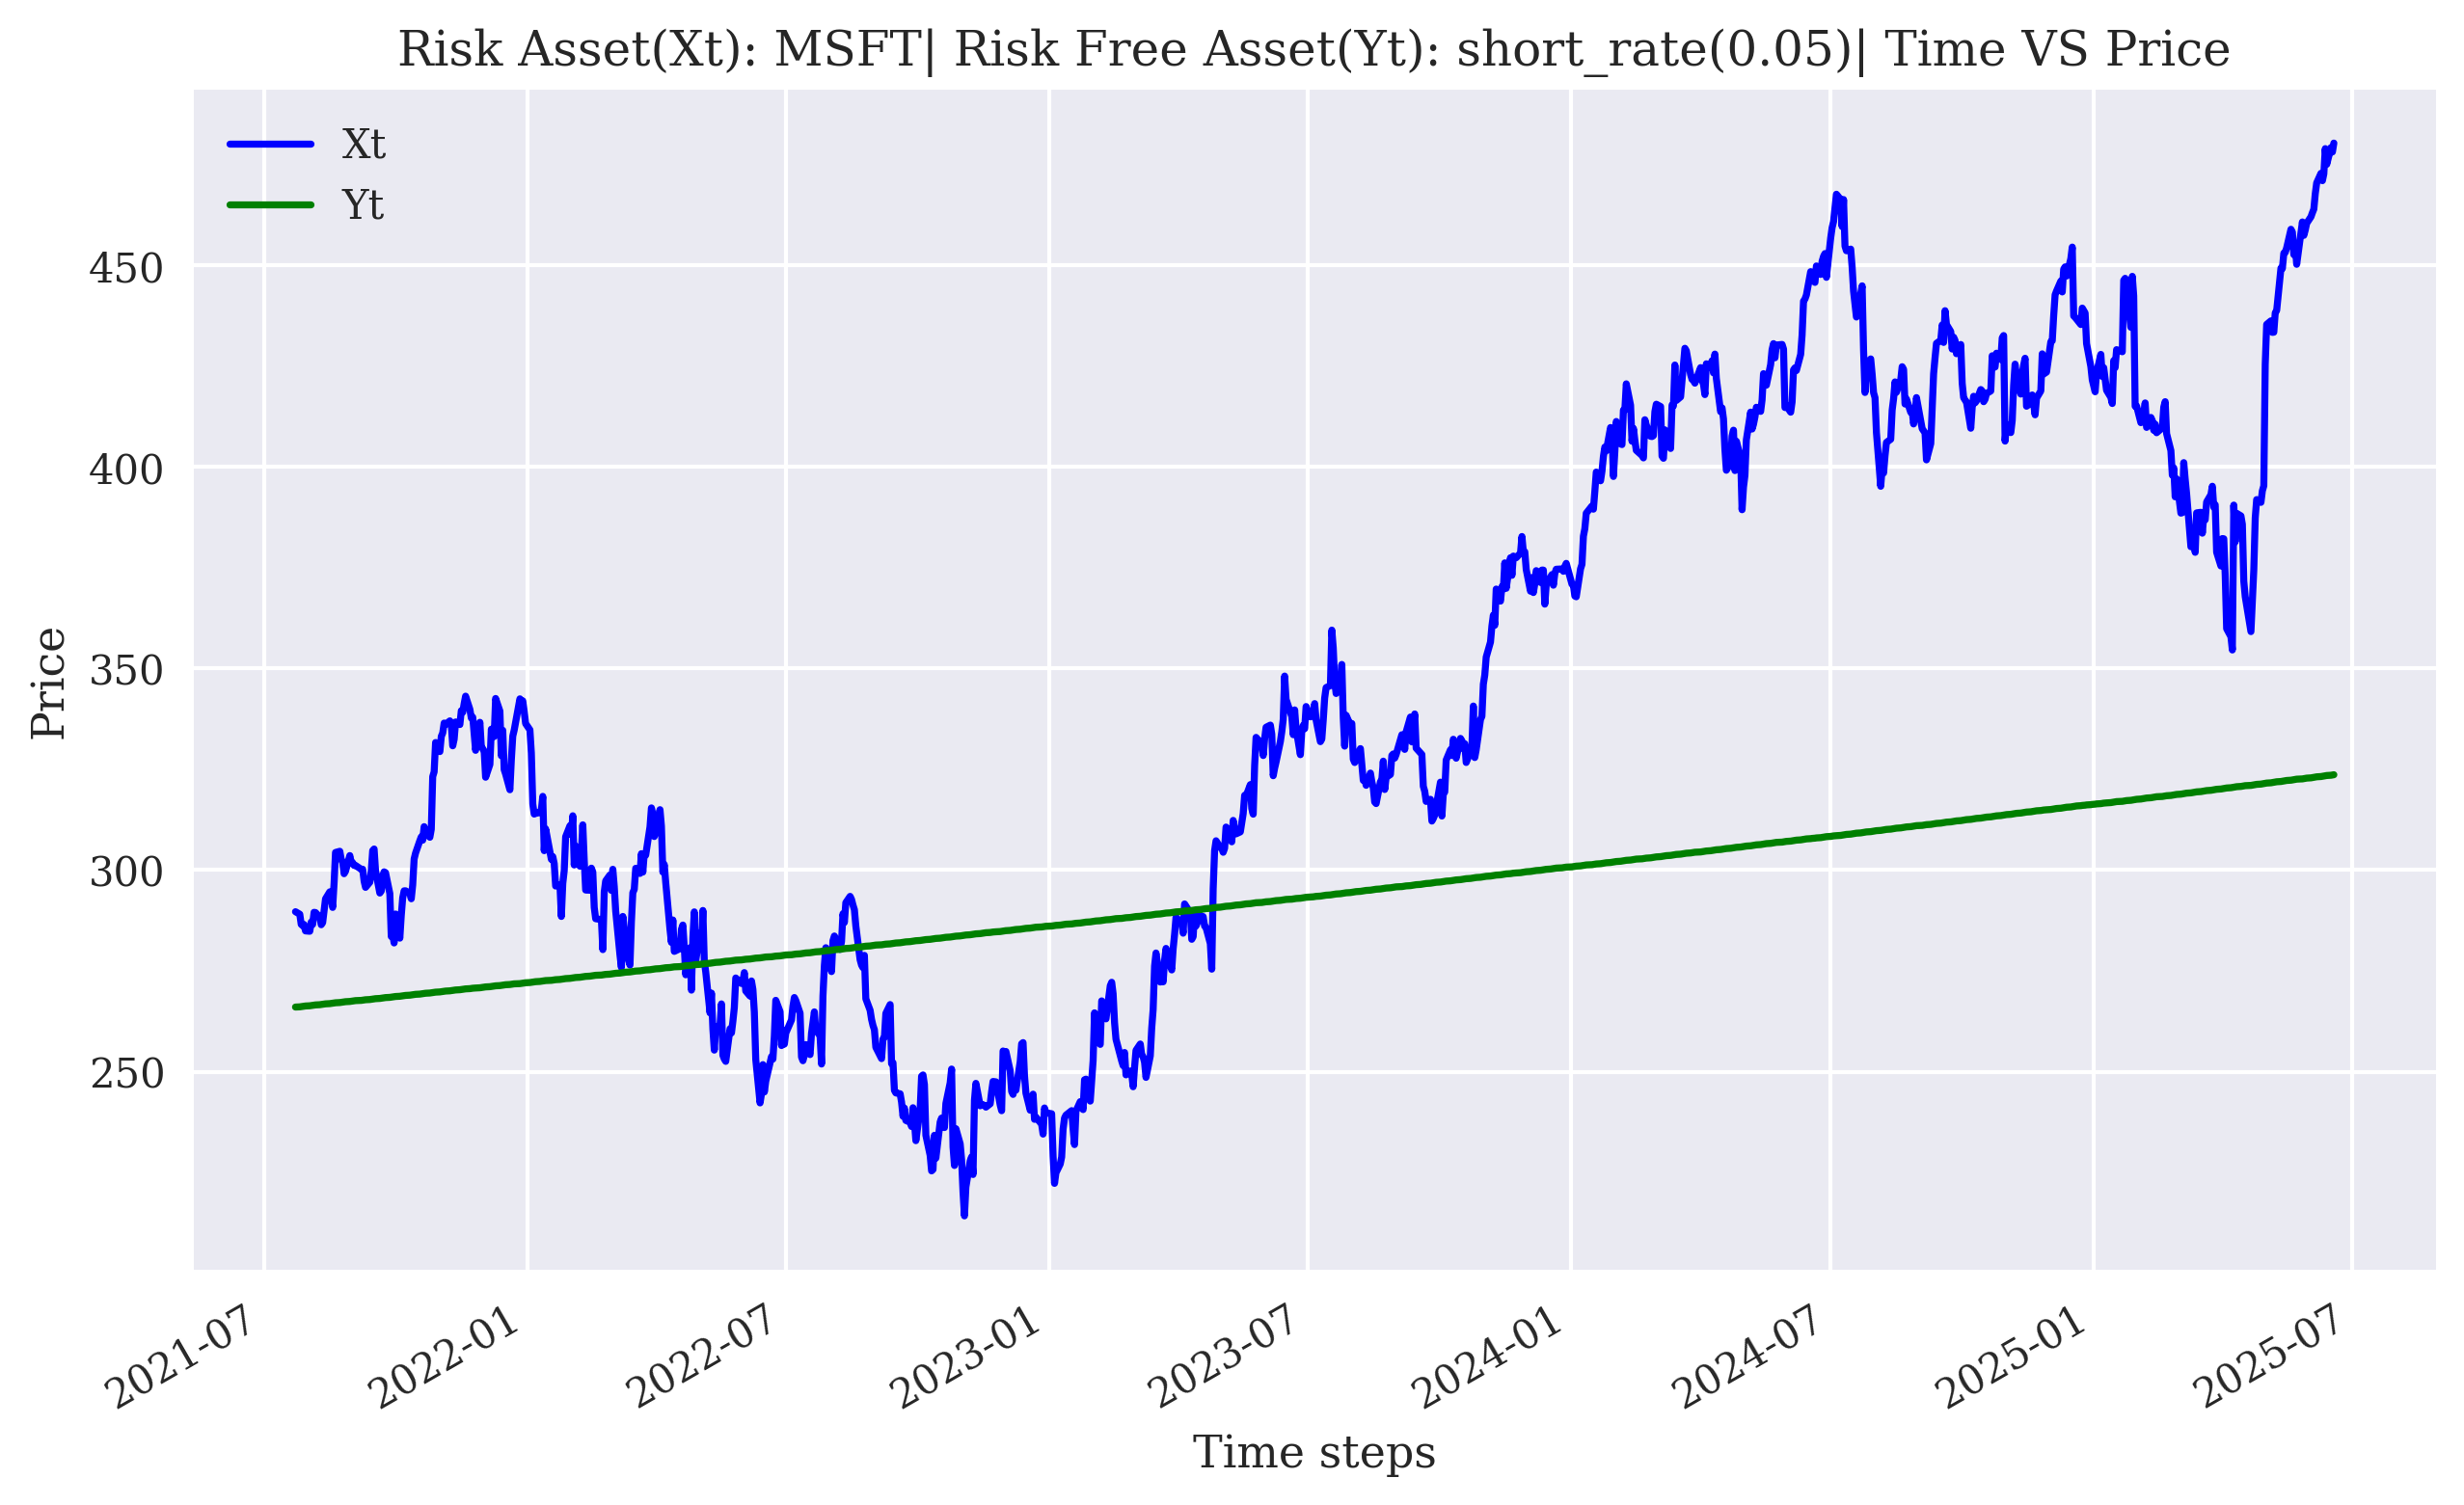

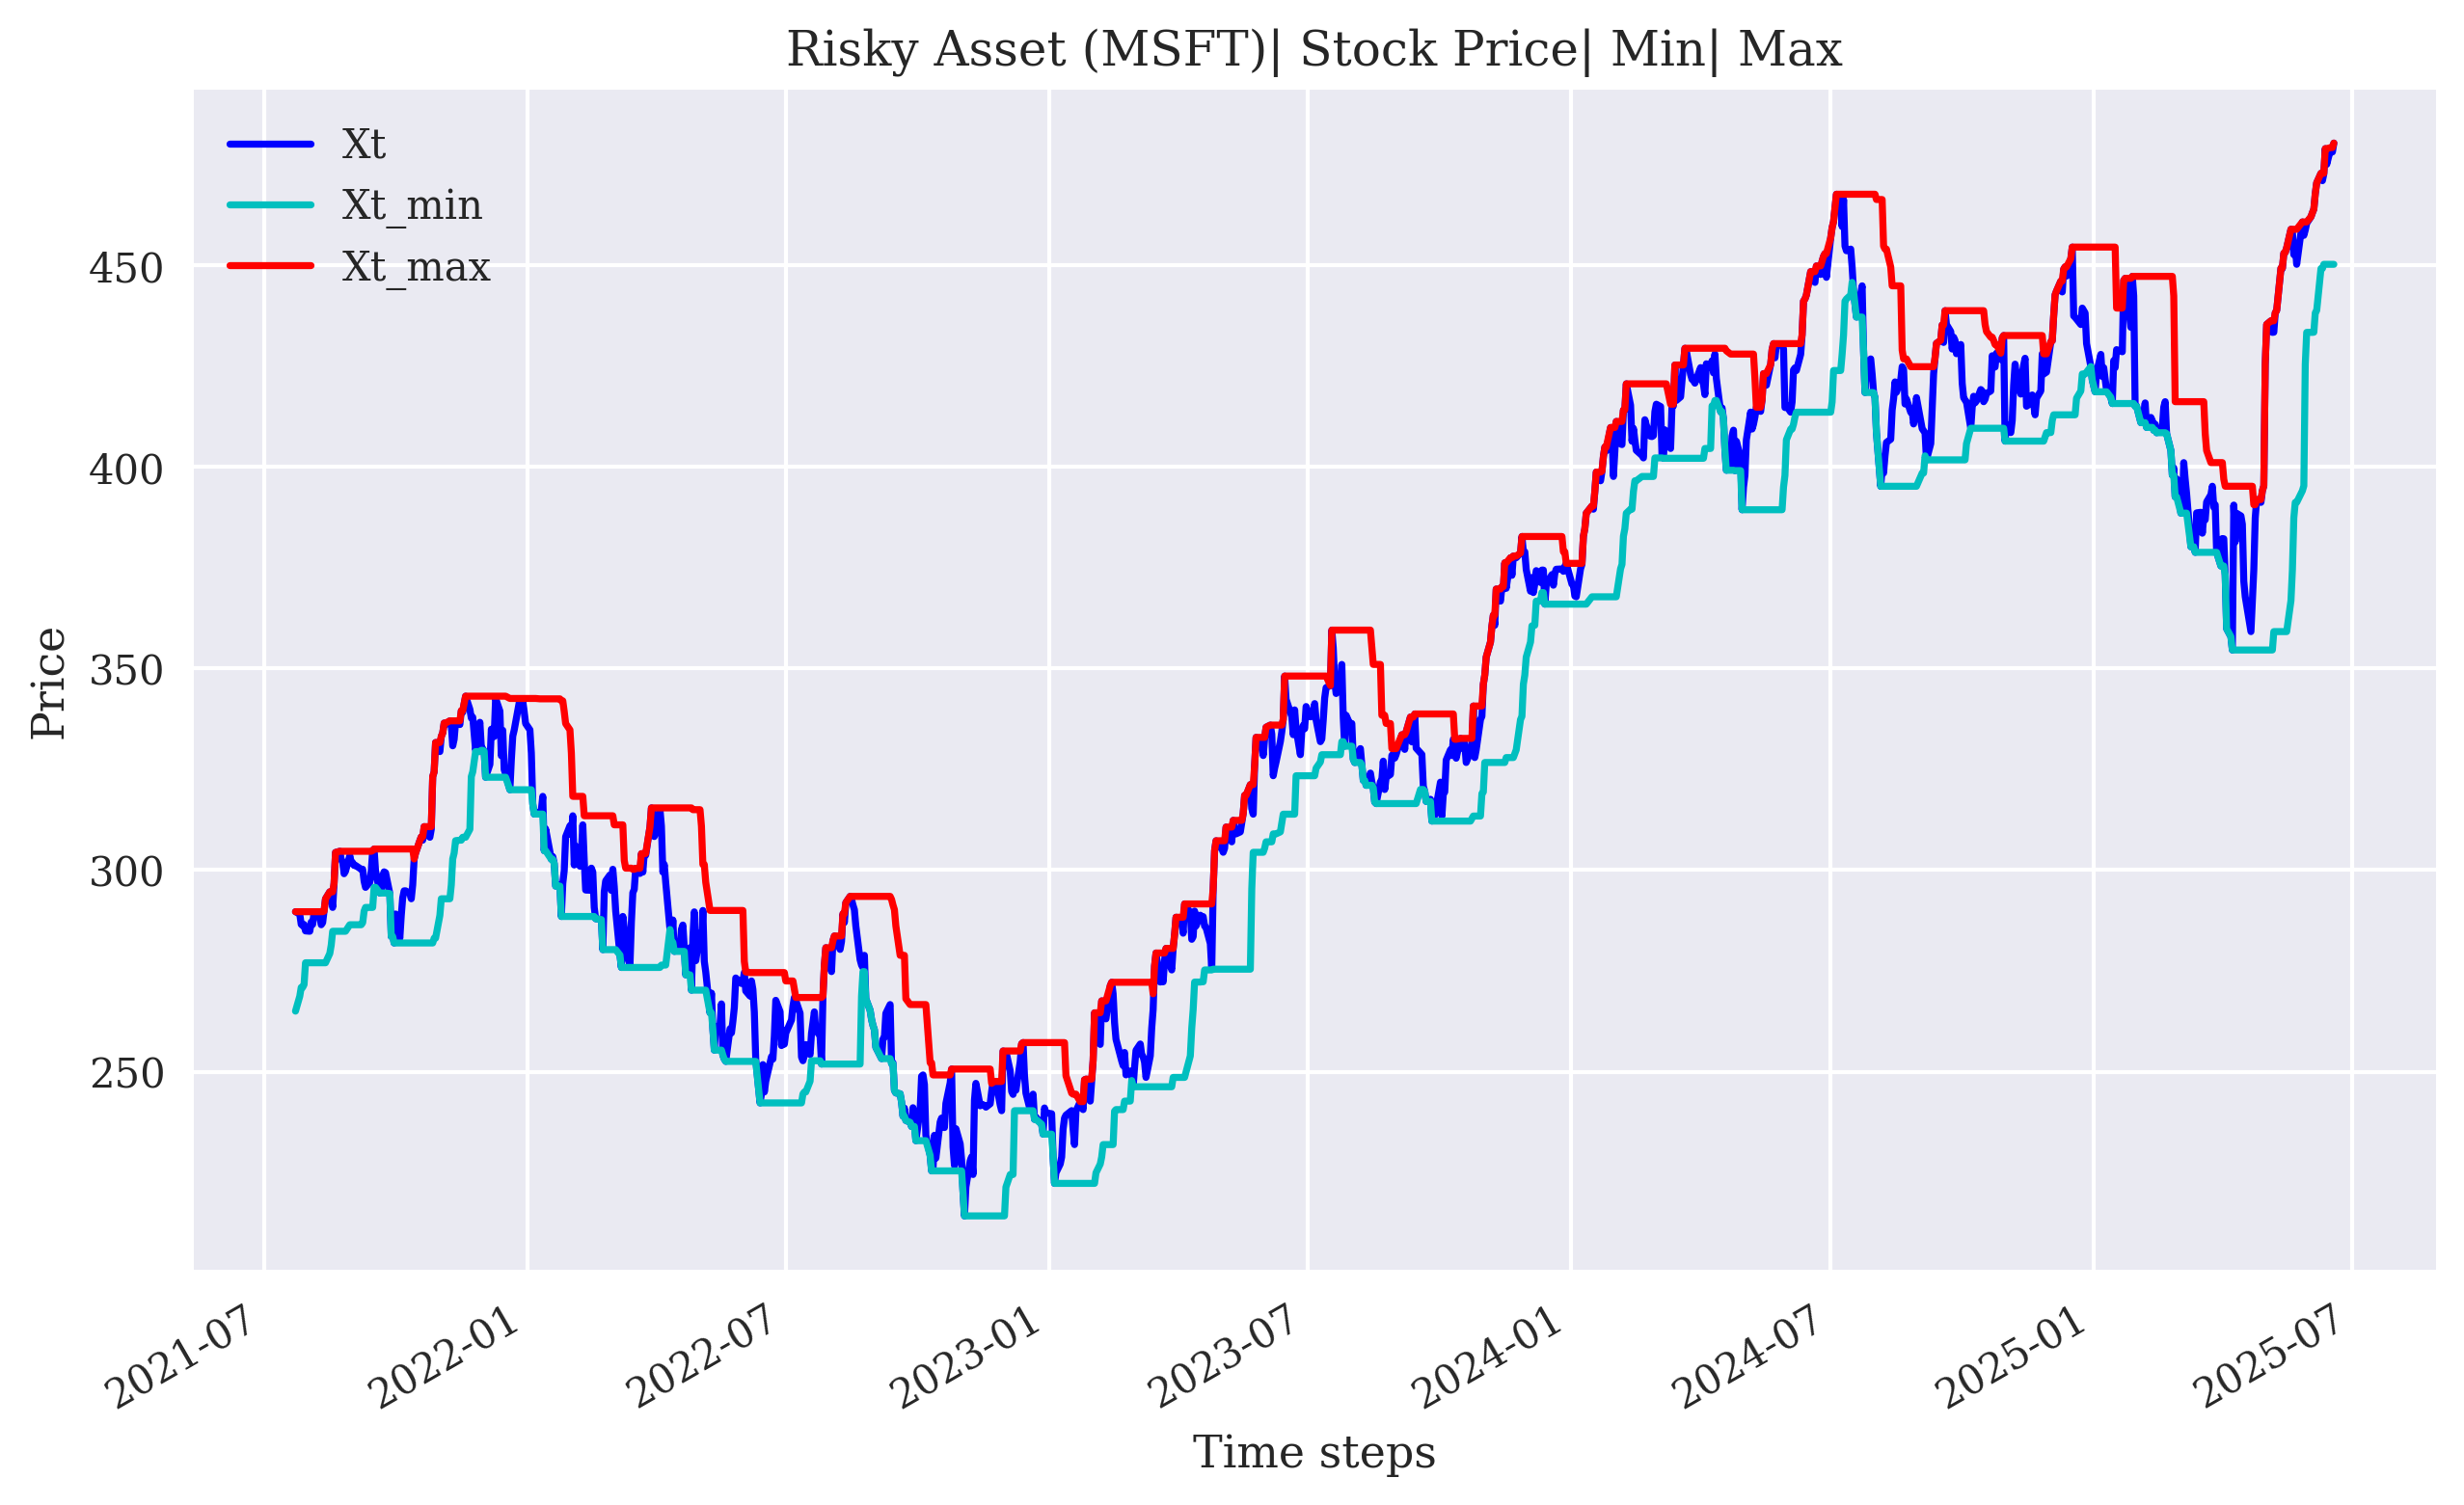

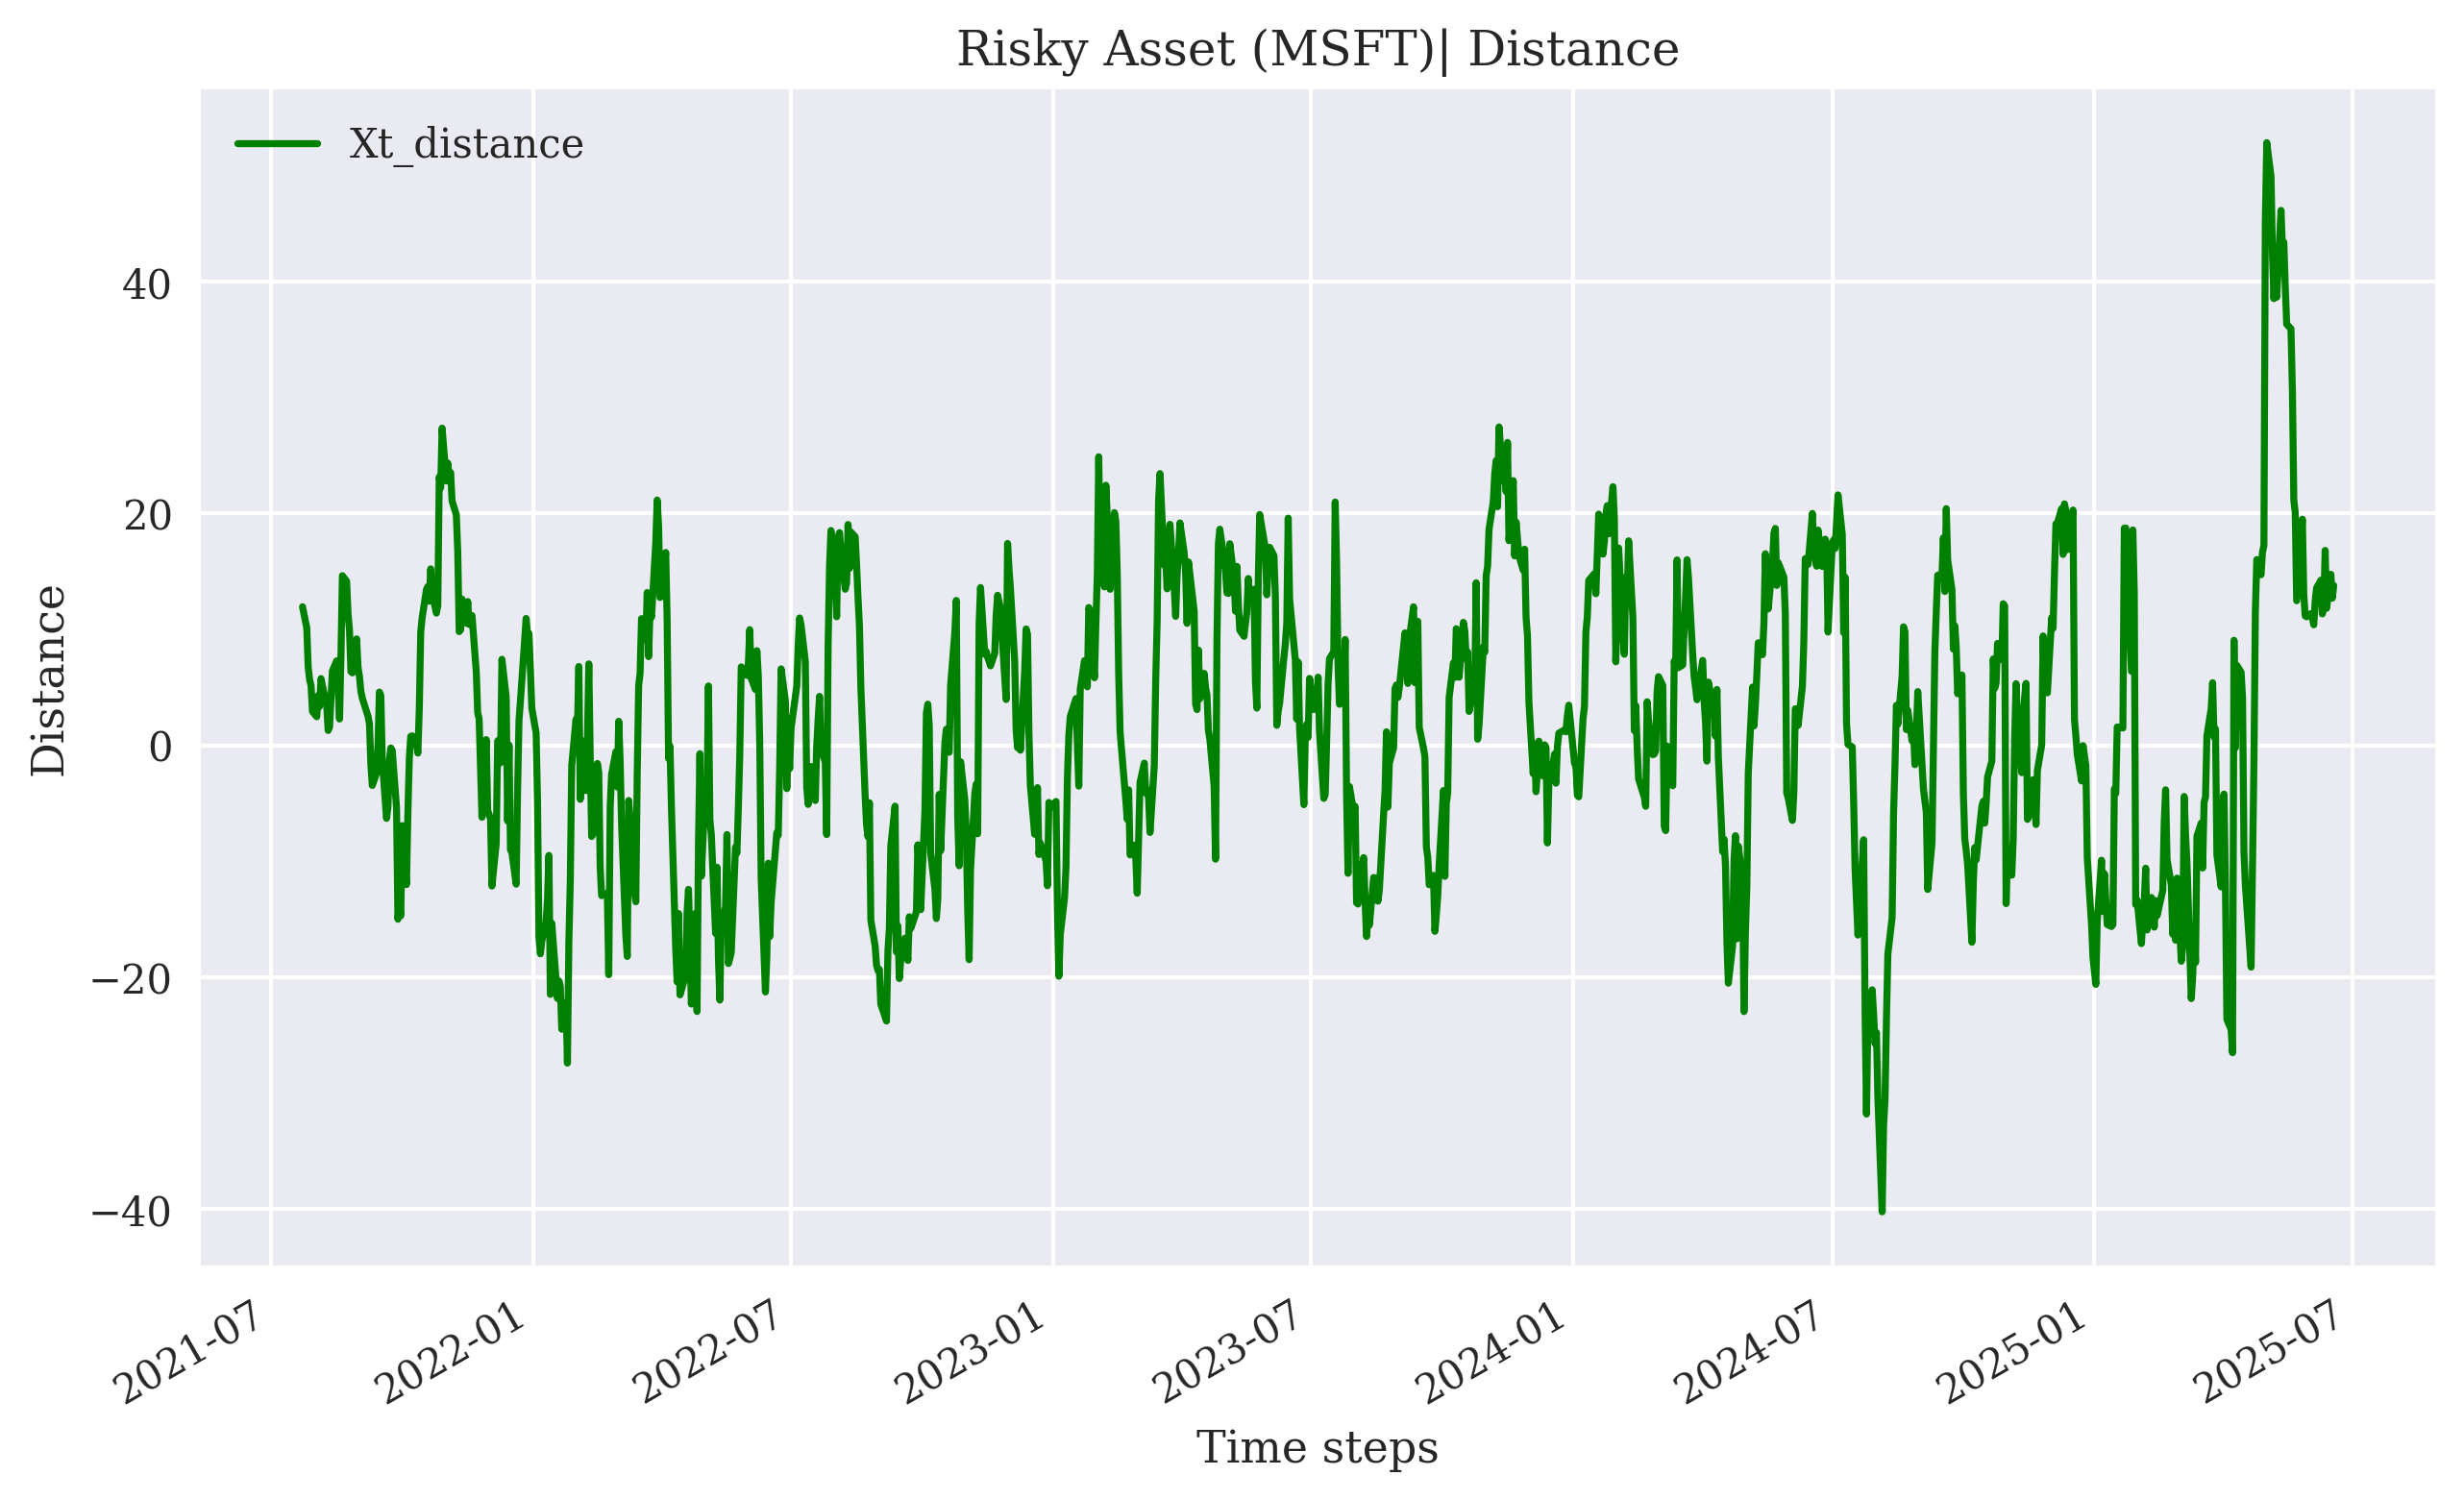

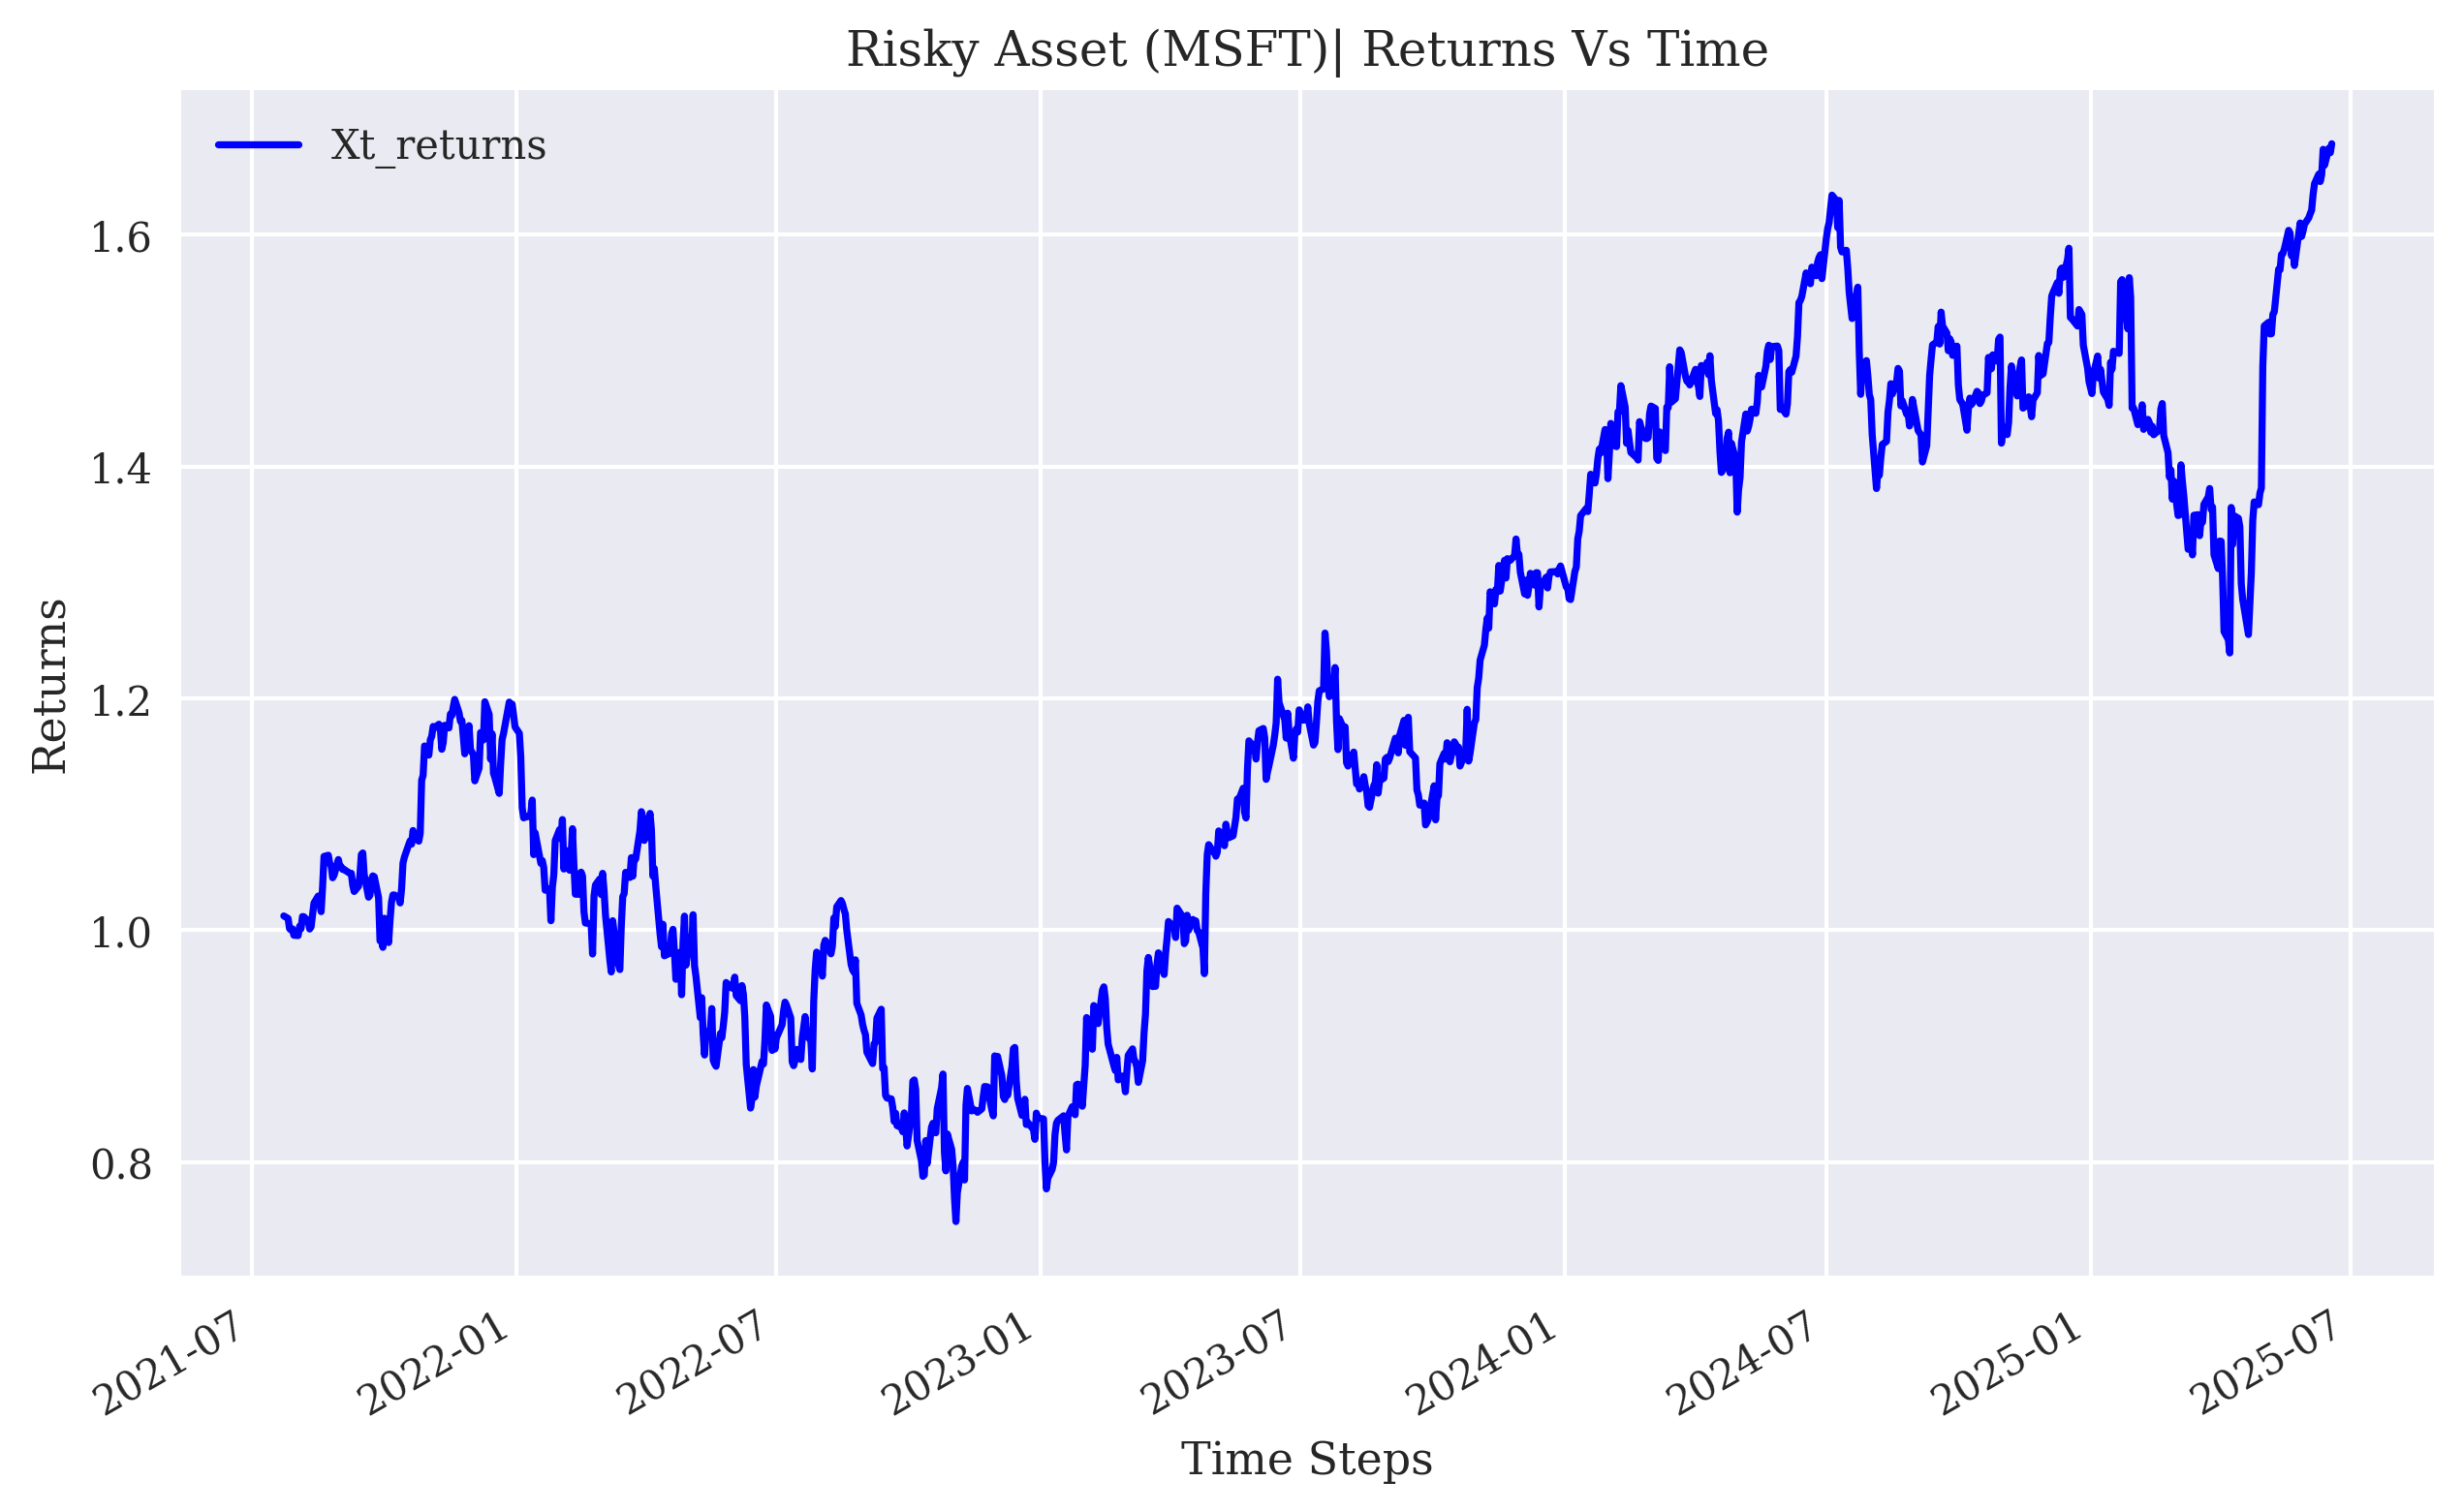

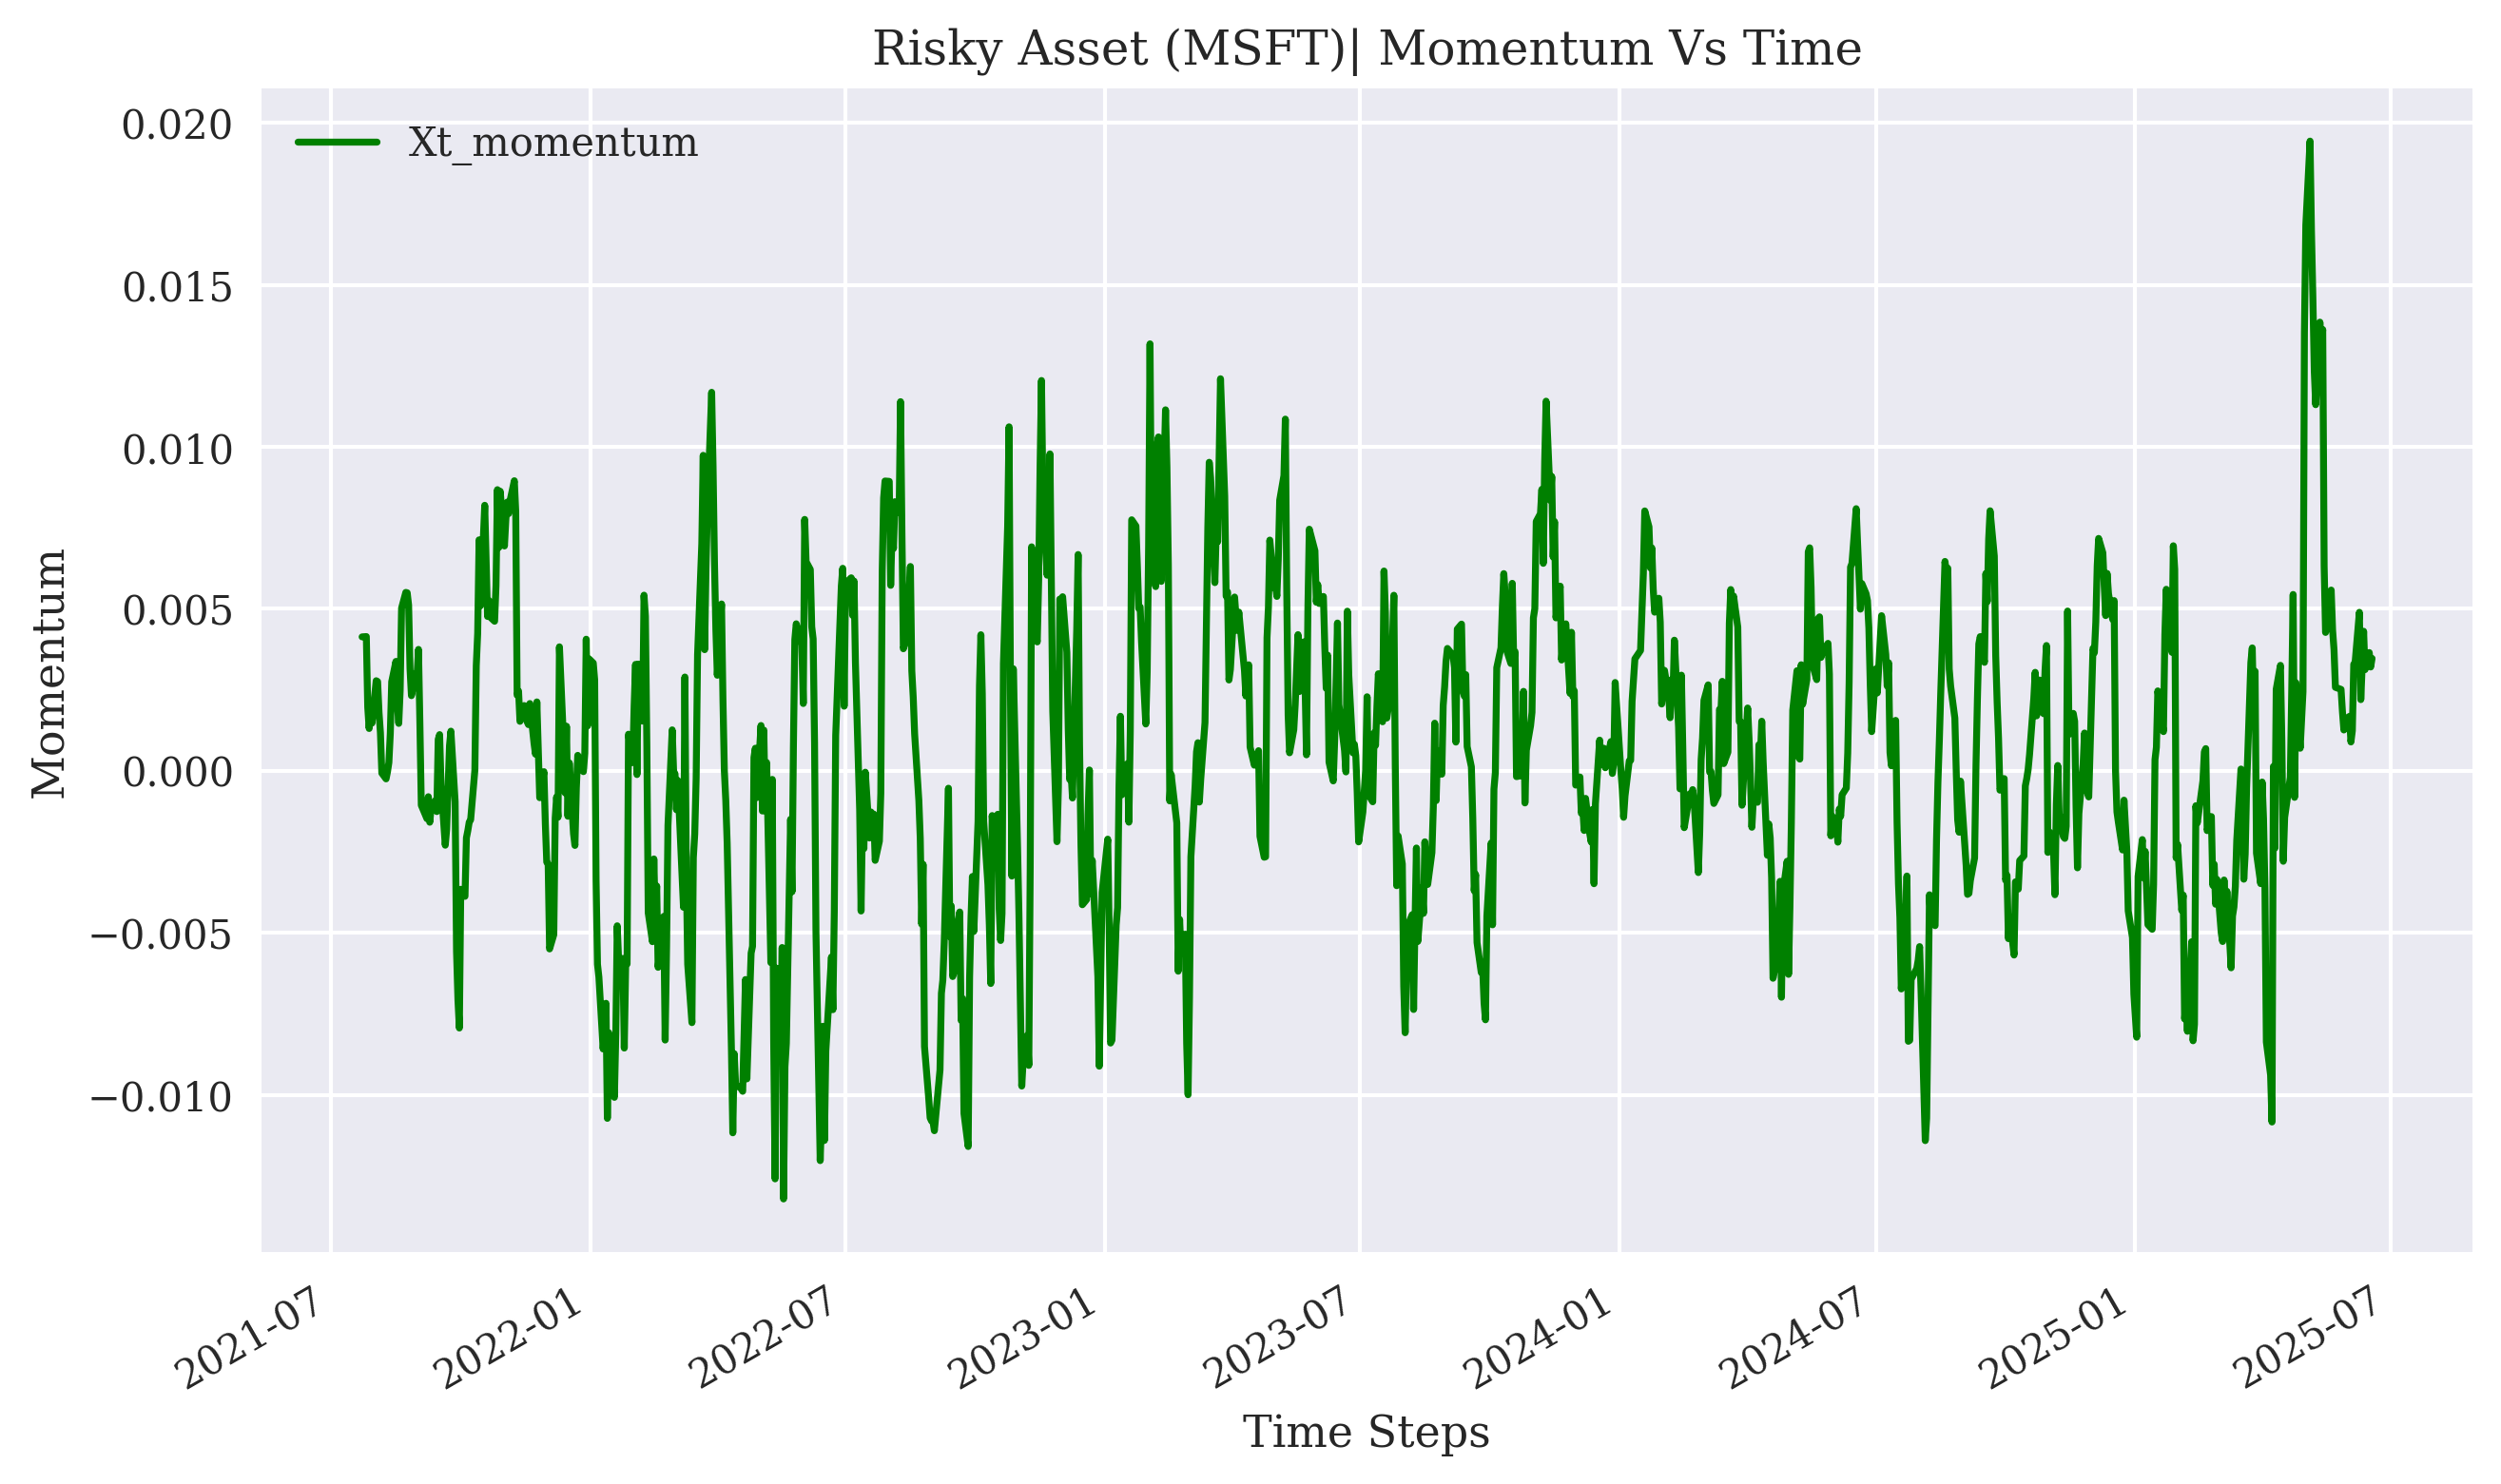

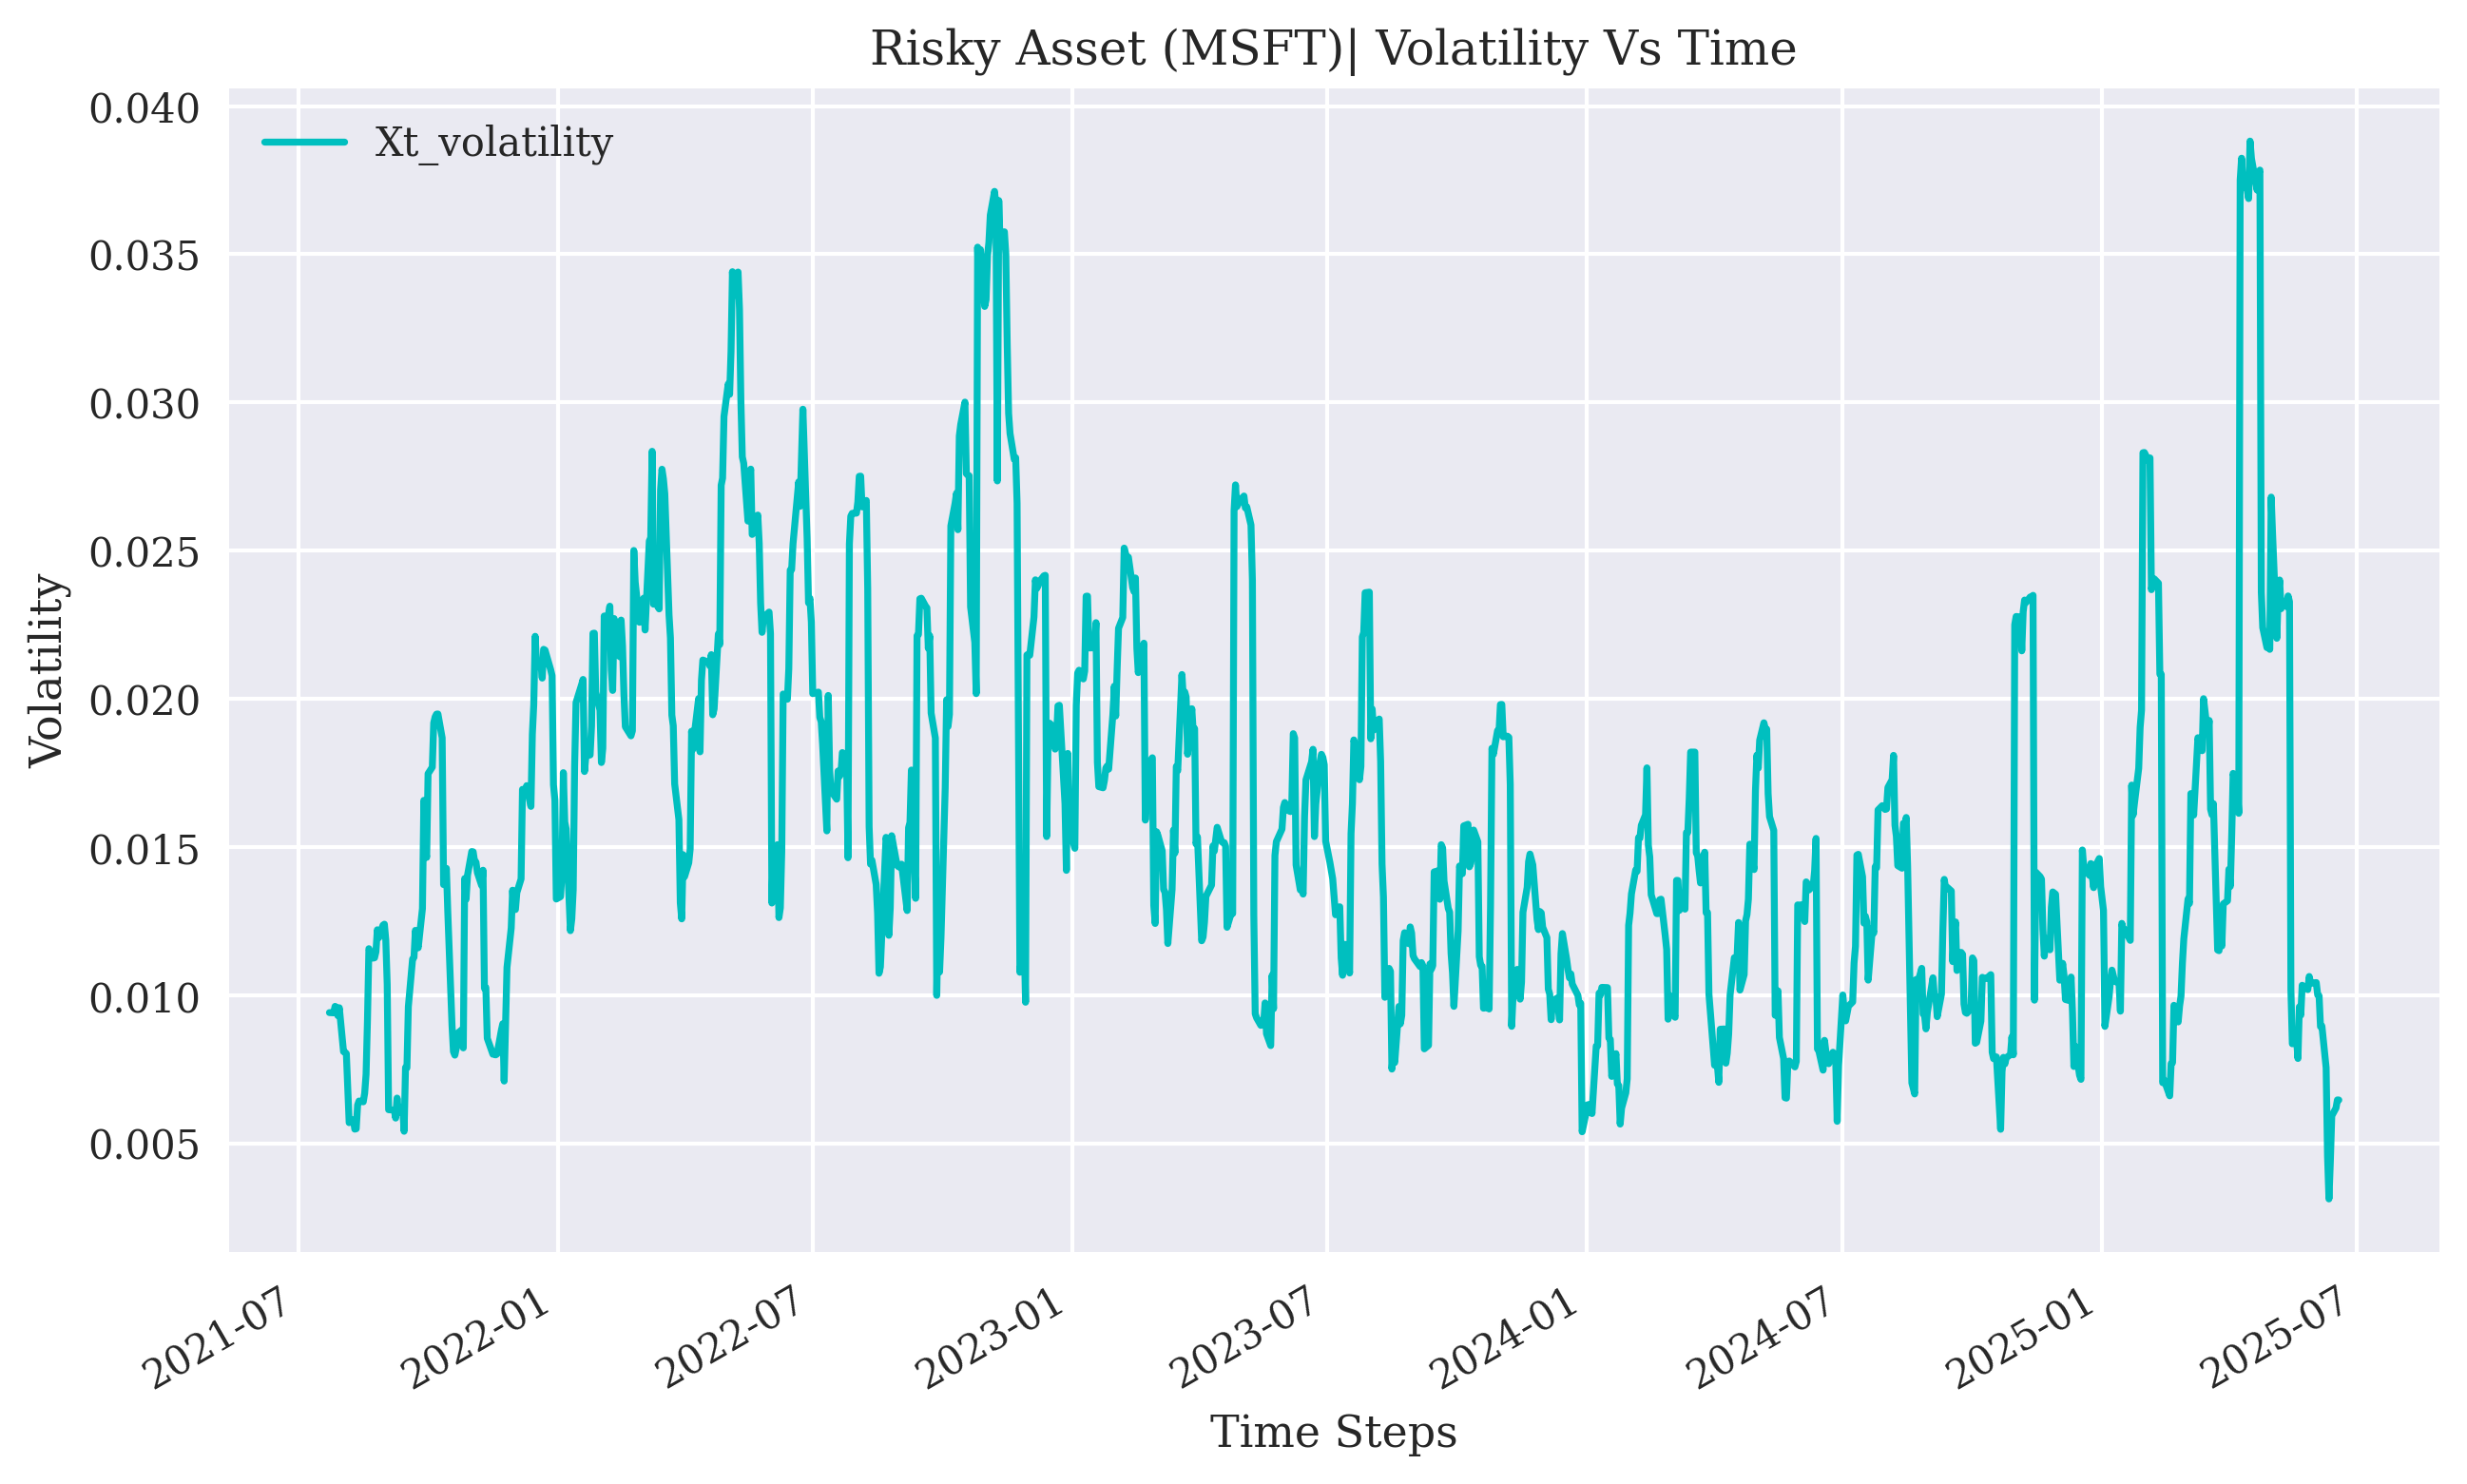

In [16]:
env.plots()

## Simulated Environement

### Initialization

In [17]:
simulated_env=Simulated_Environment(
    initial_value=100.0,
    short_rate=[0.05,0.0025,0.07],
    index_drift=[0.05,0.1,0.15],
    index_volatility=[0.1,0.2,0.3],
    maturity=4.0,
    steps=1000,
    number_lags=5,
    sma_period=20,
    window=10
    
)

### Plots

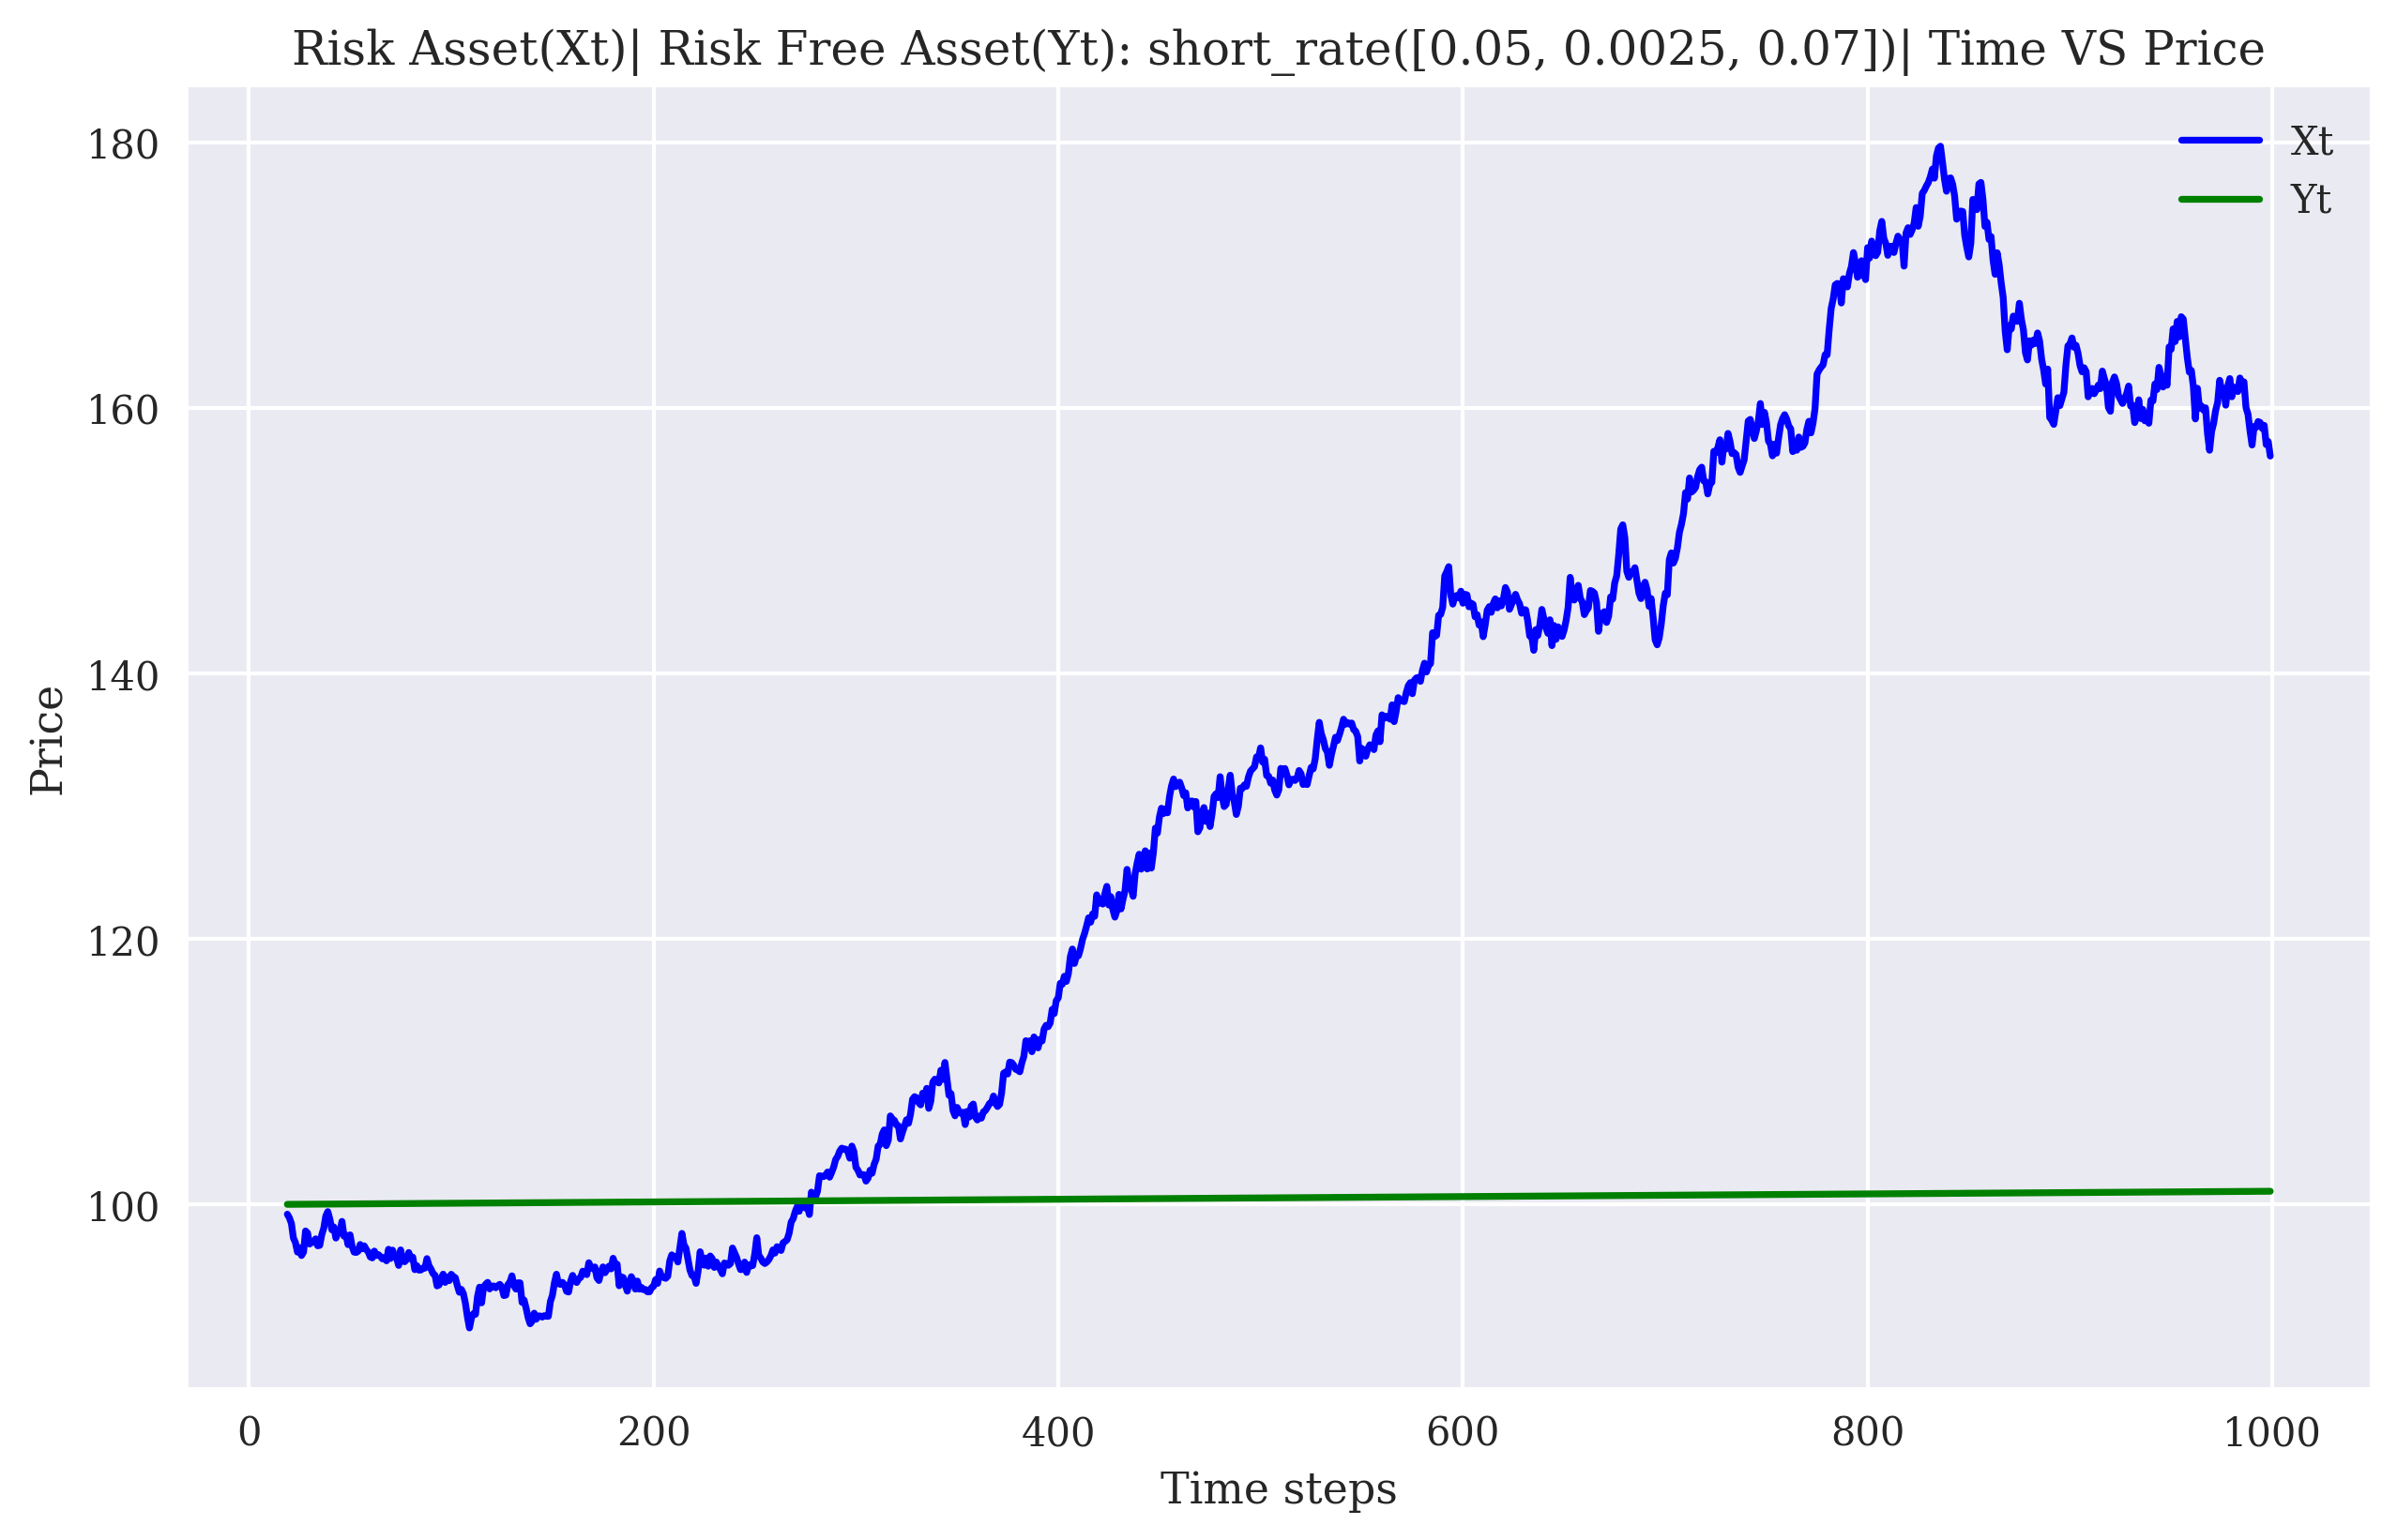

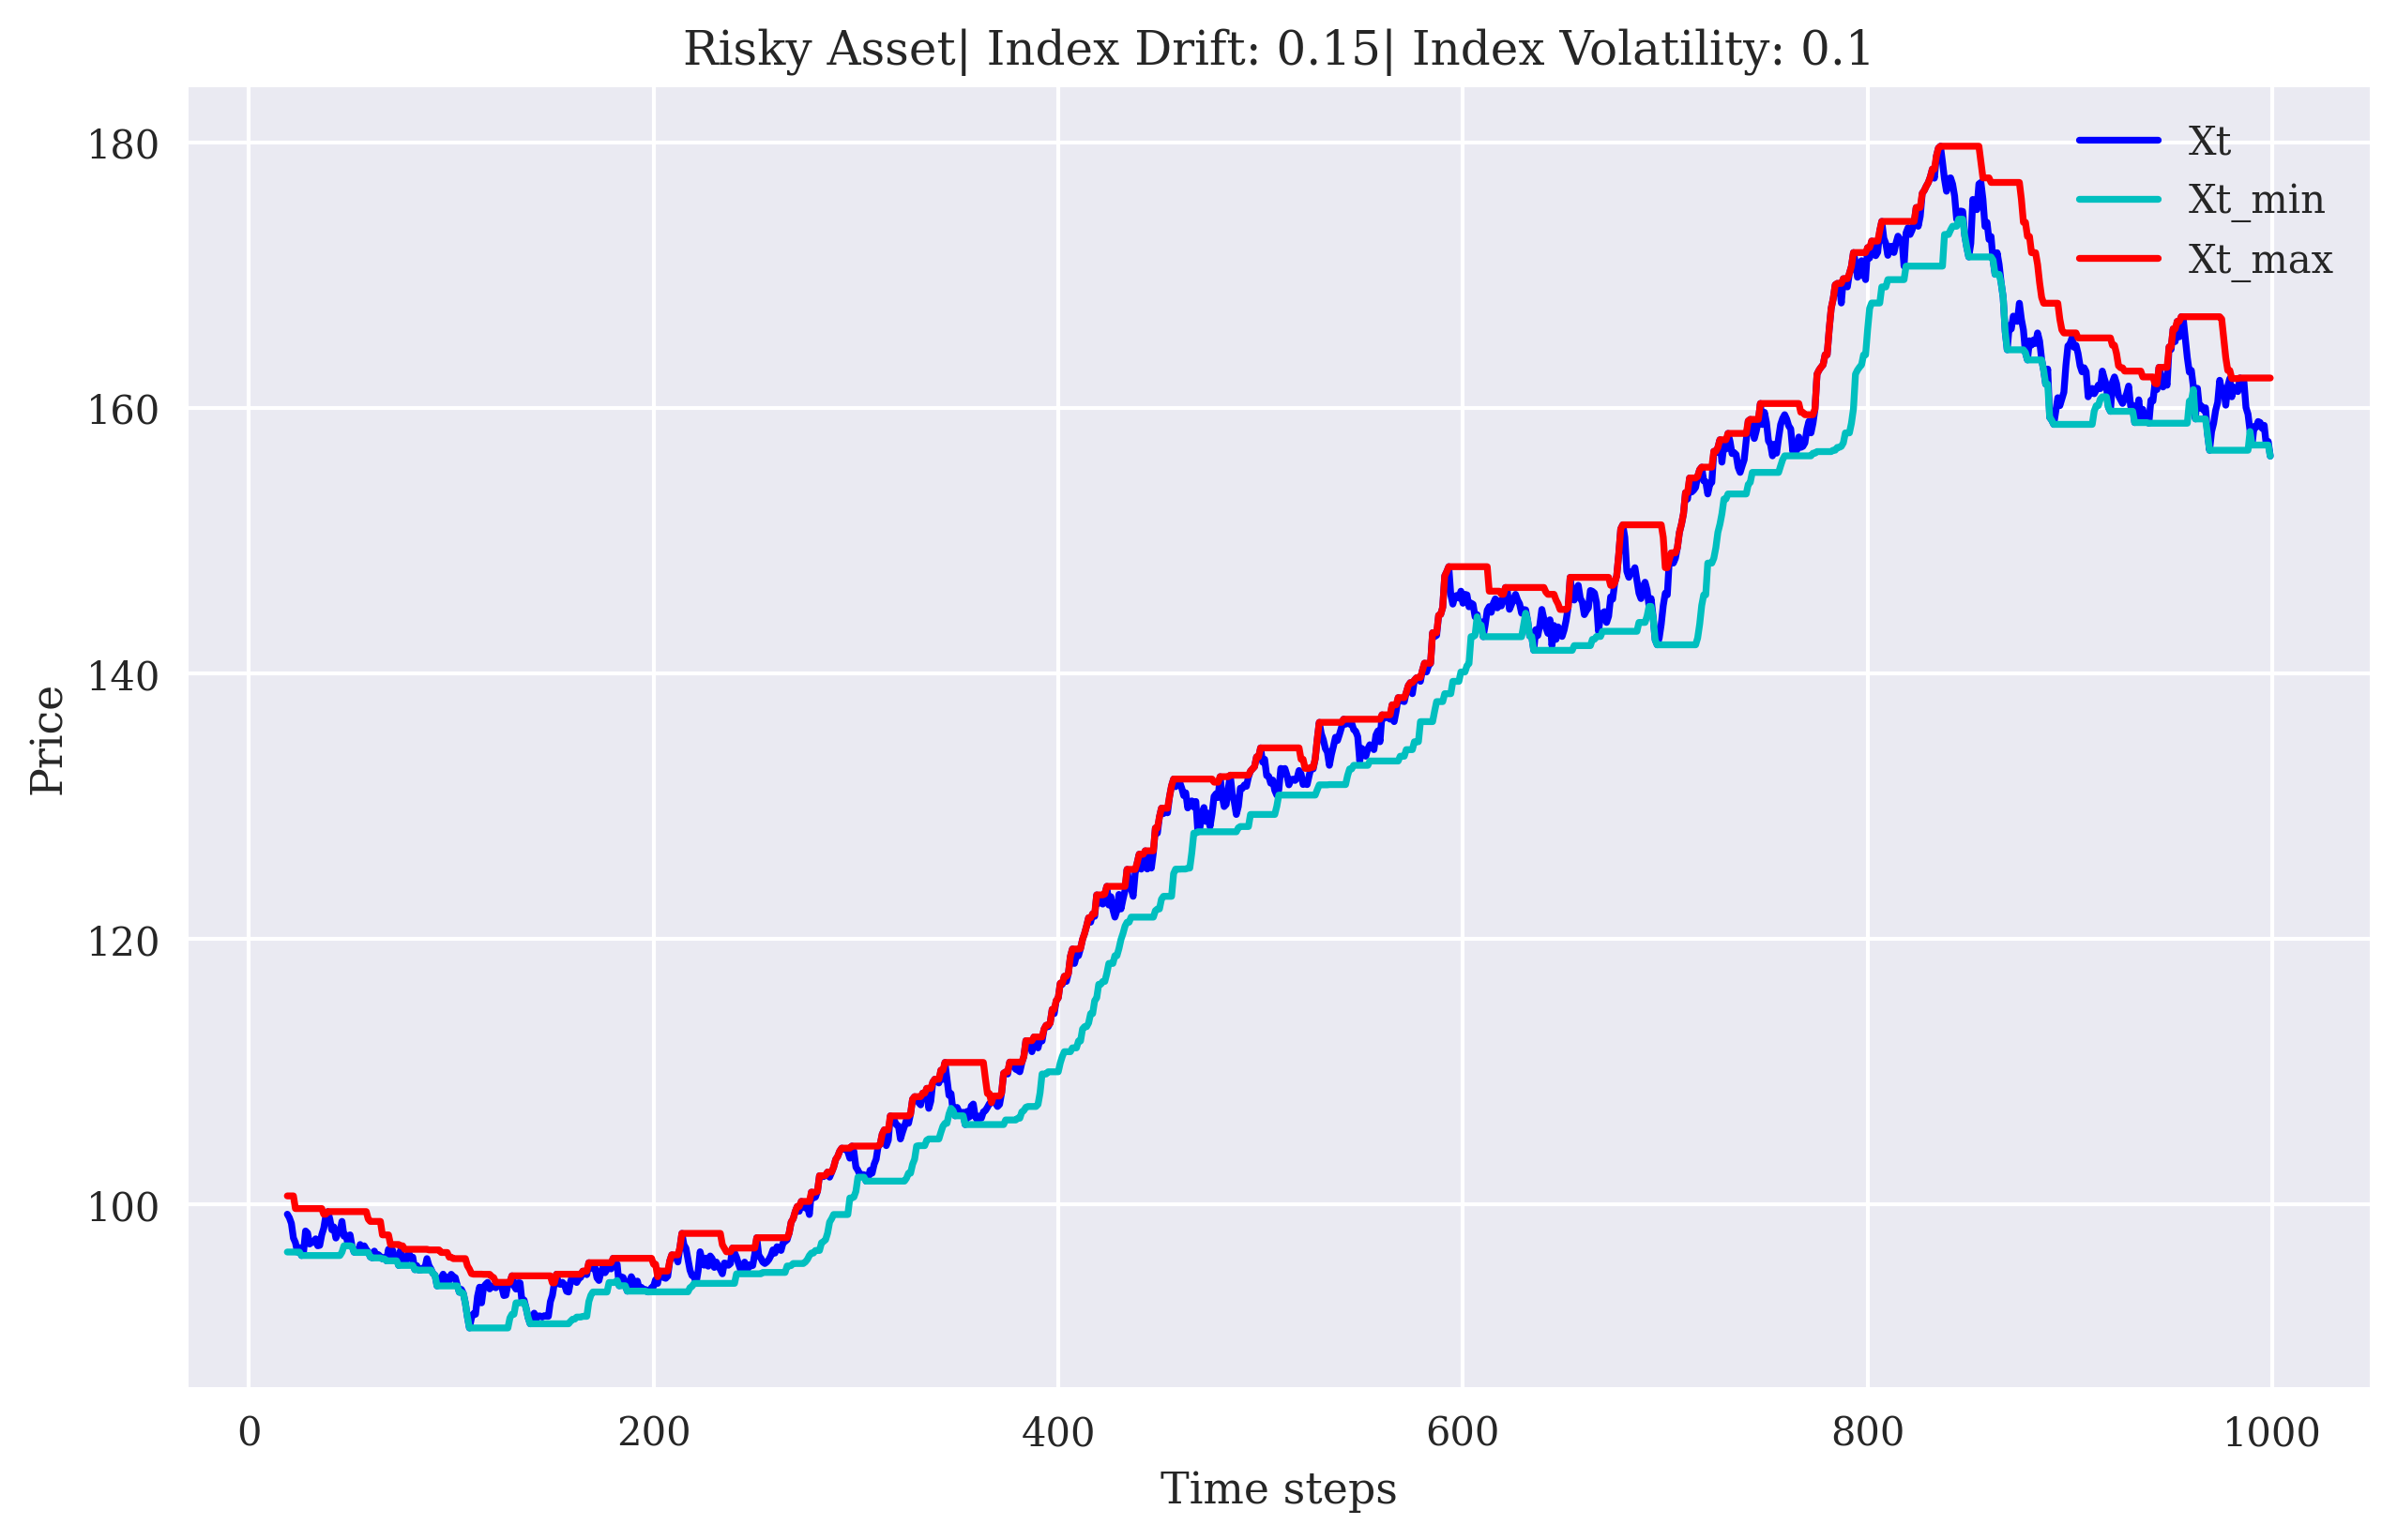

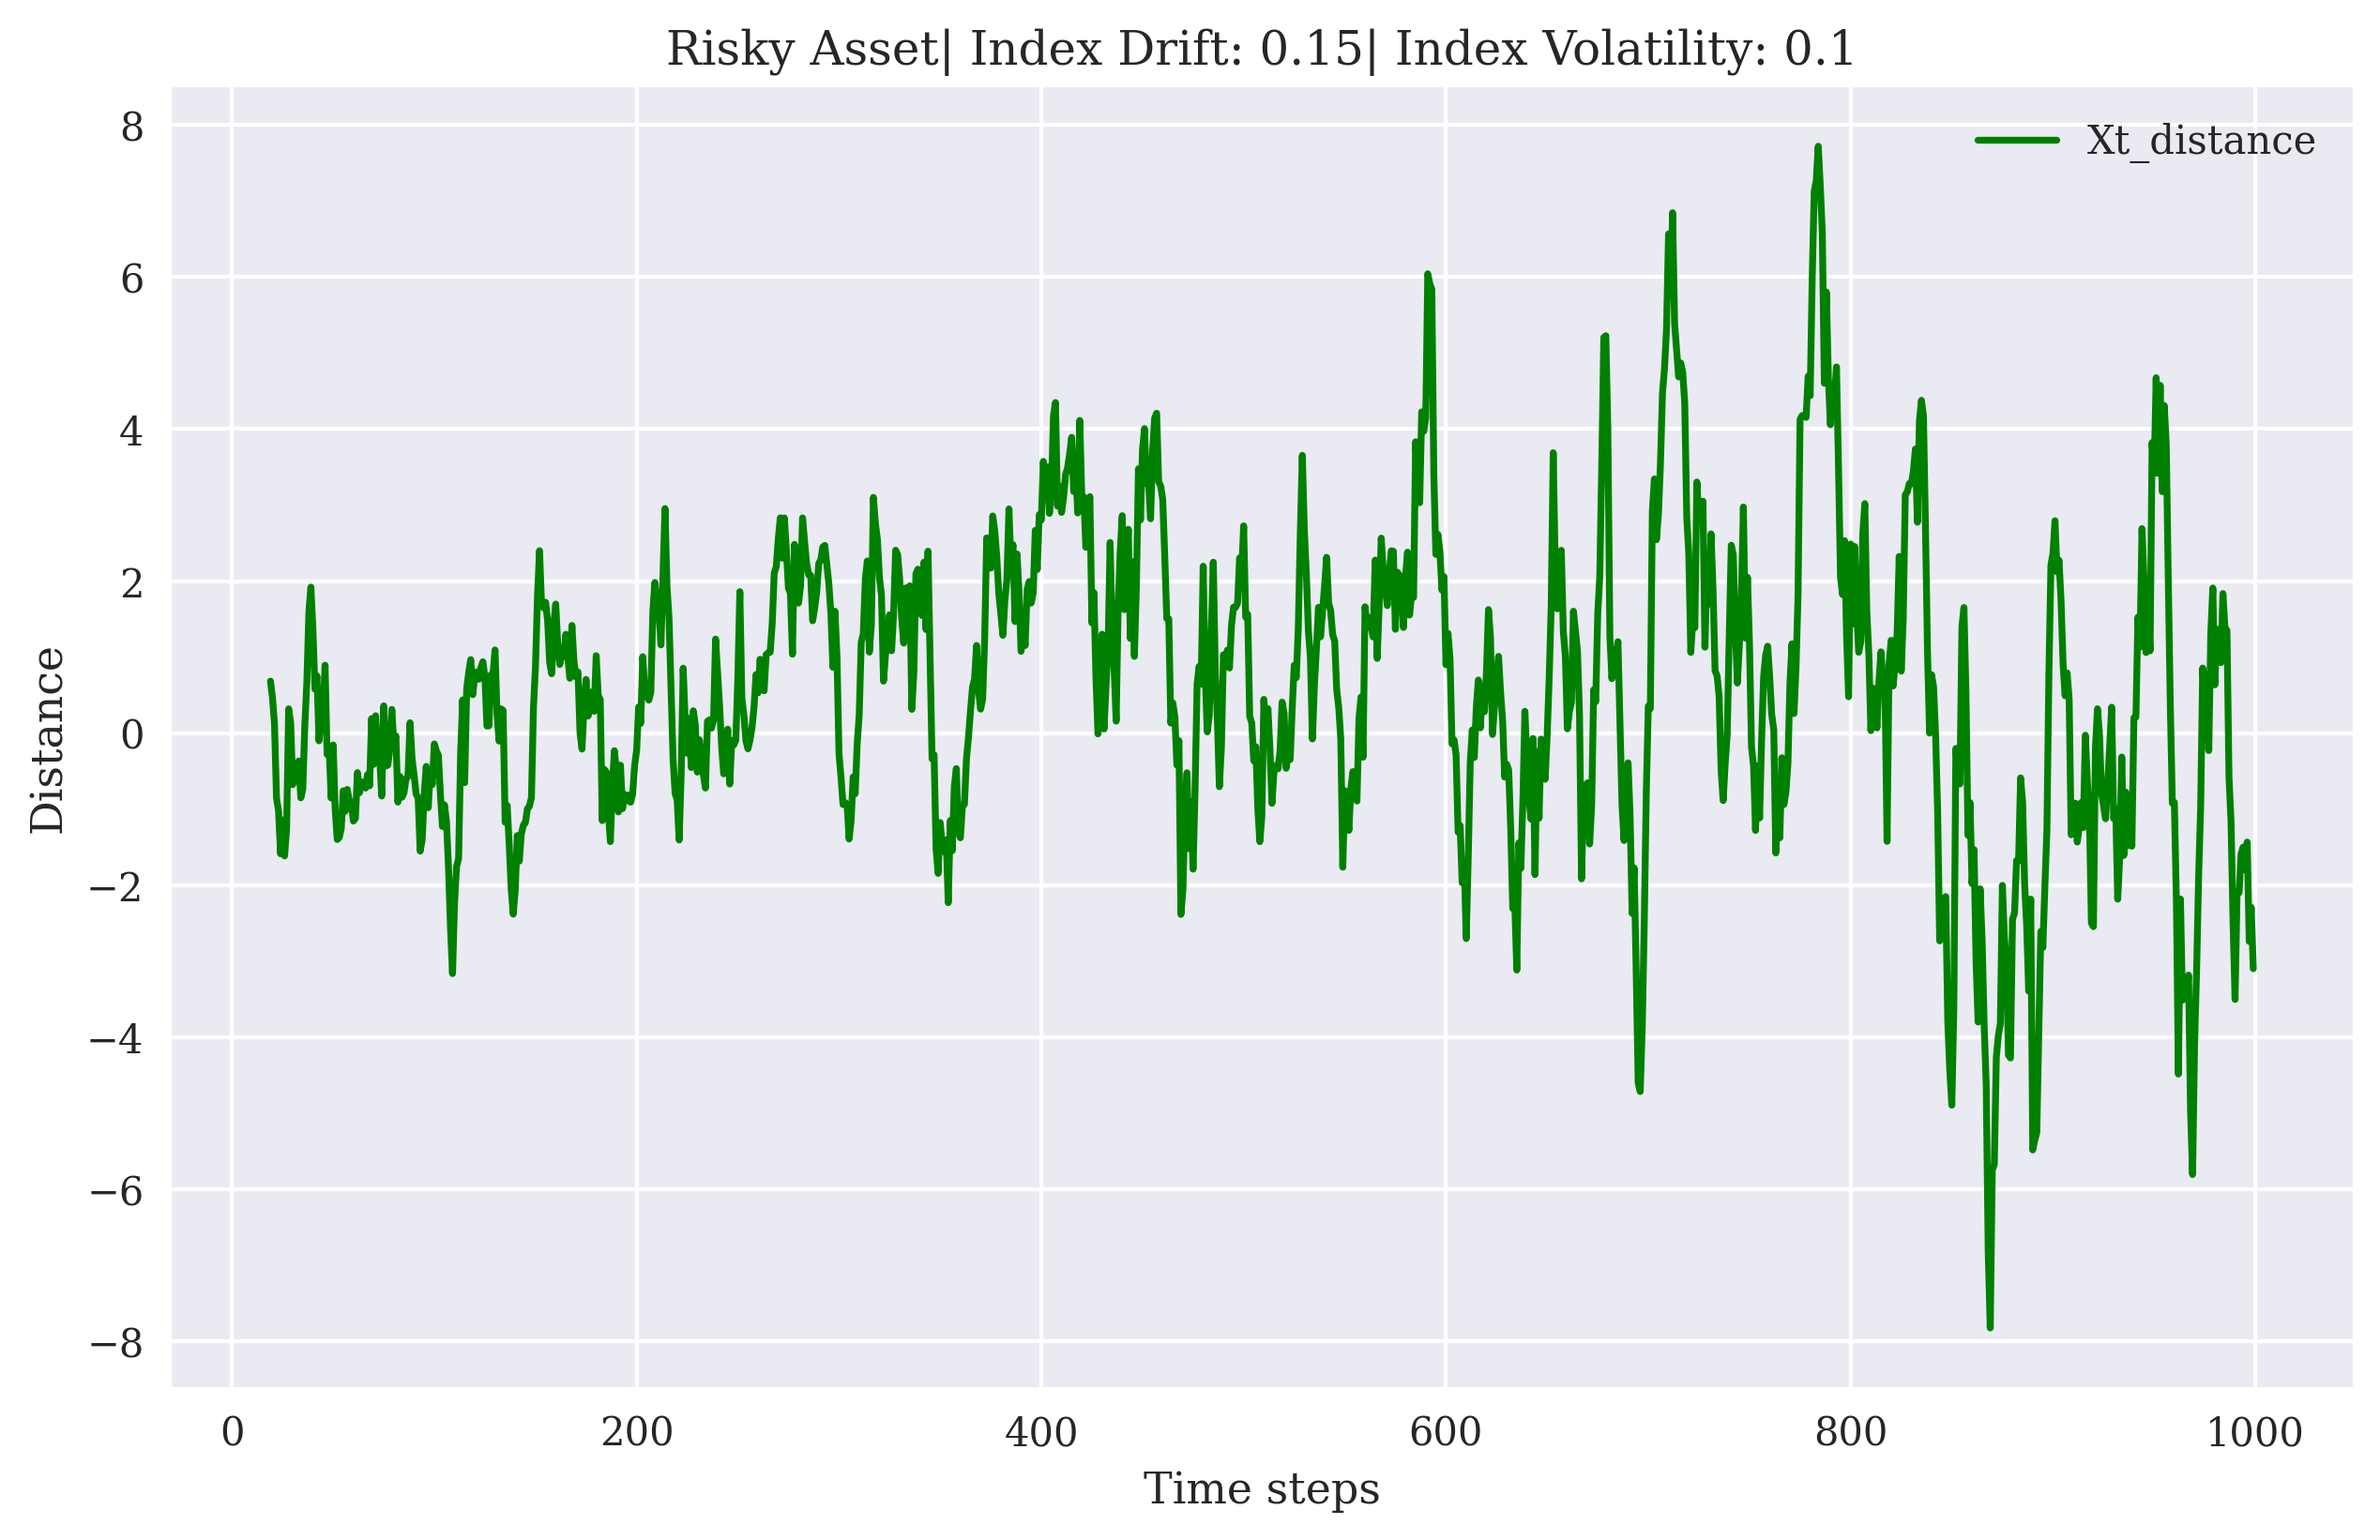

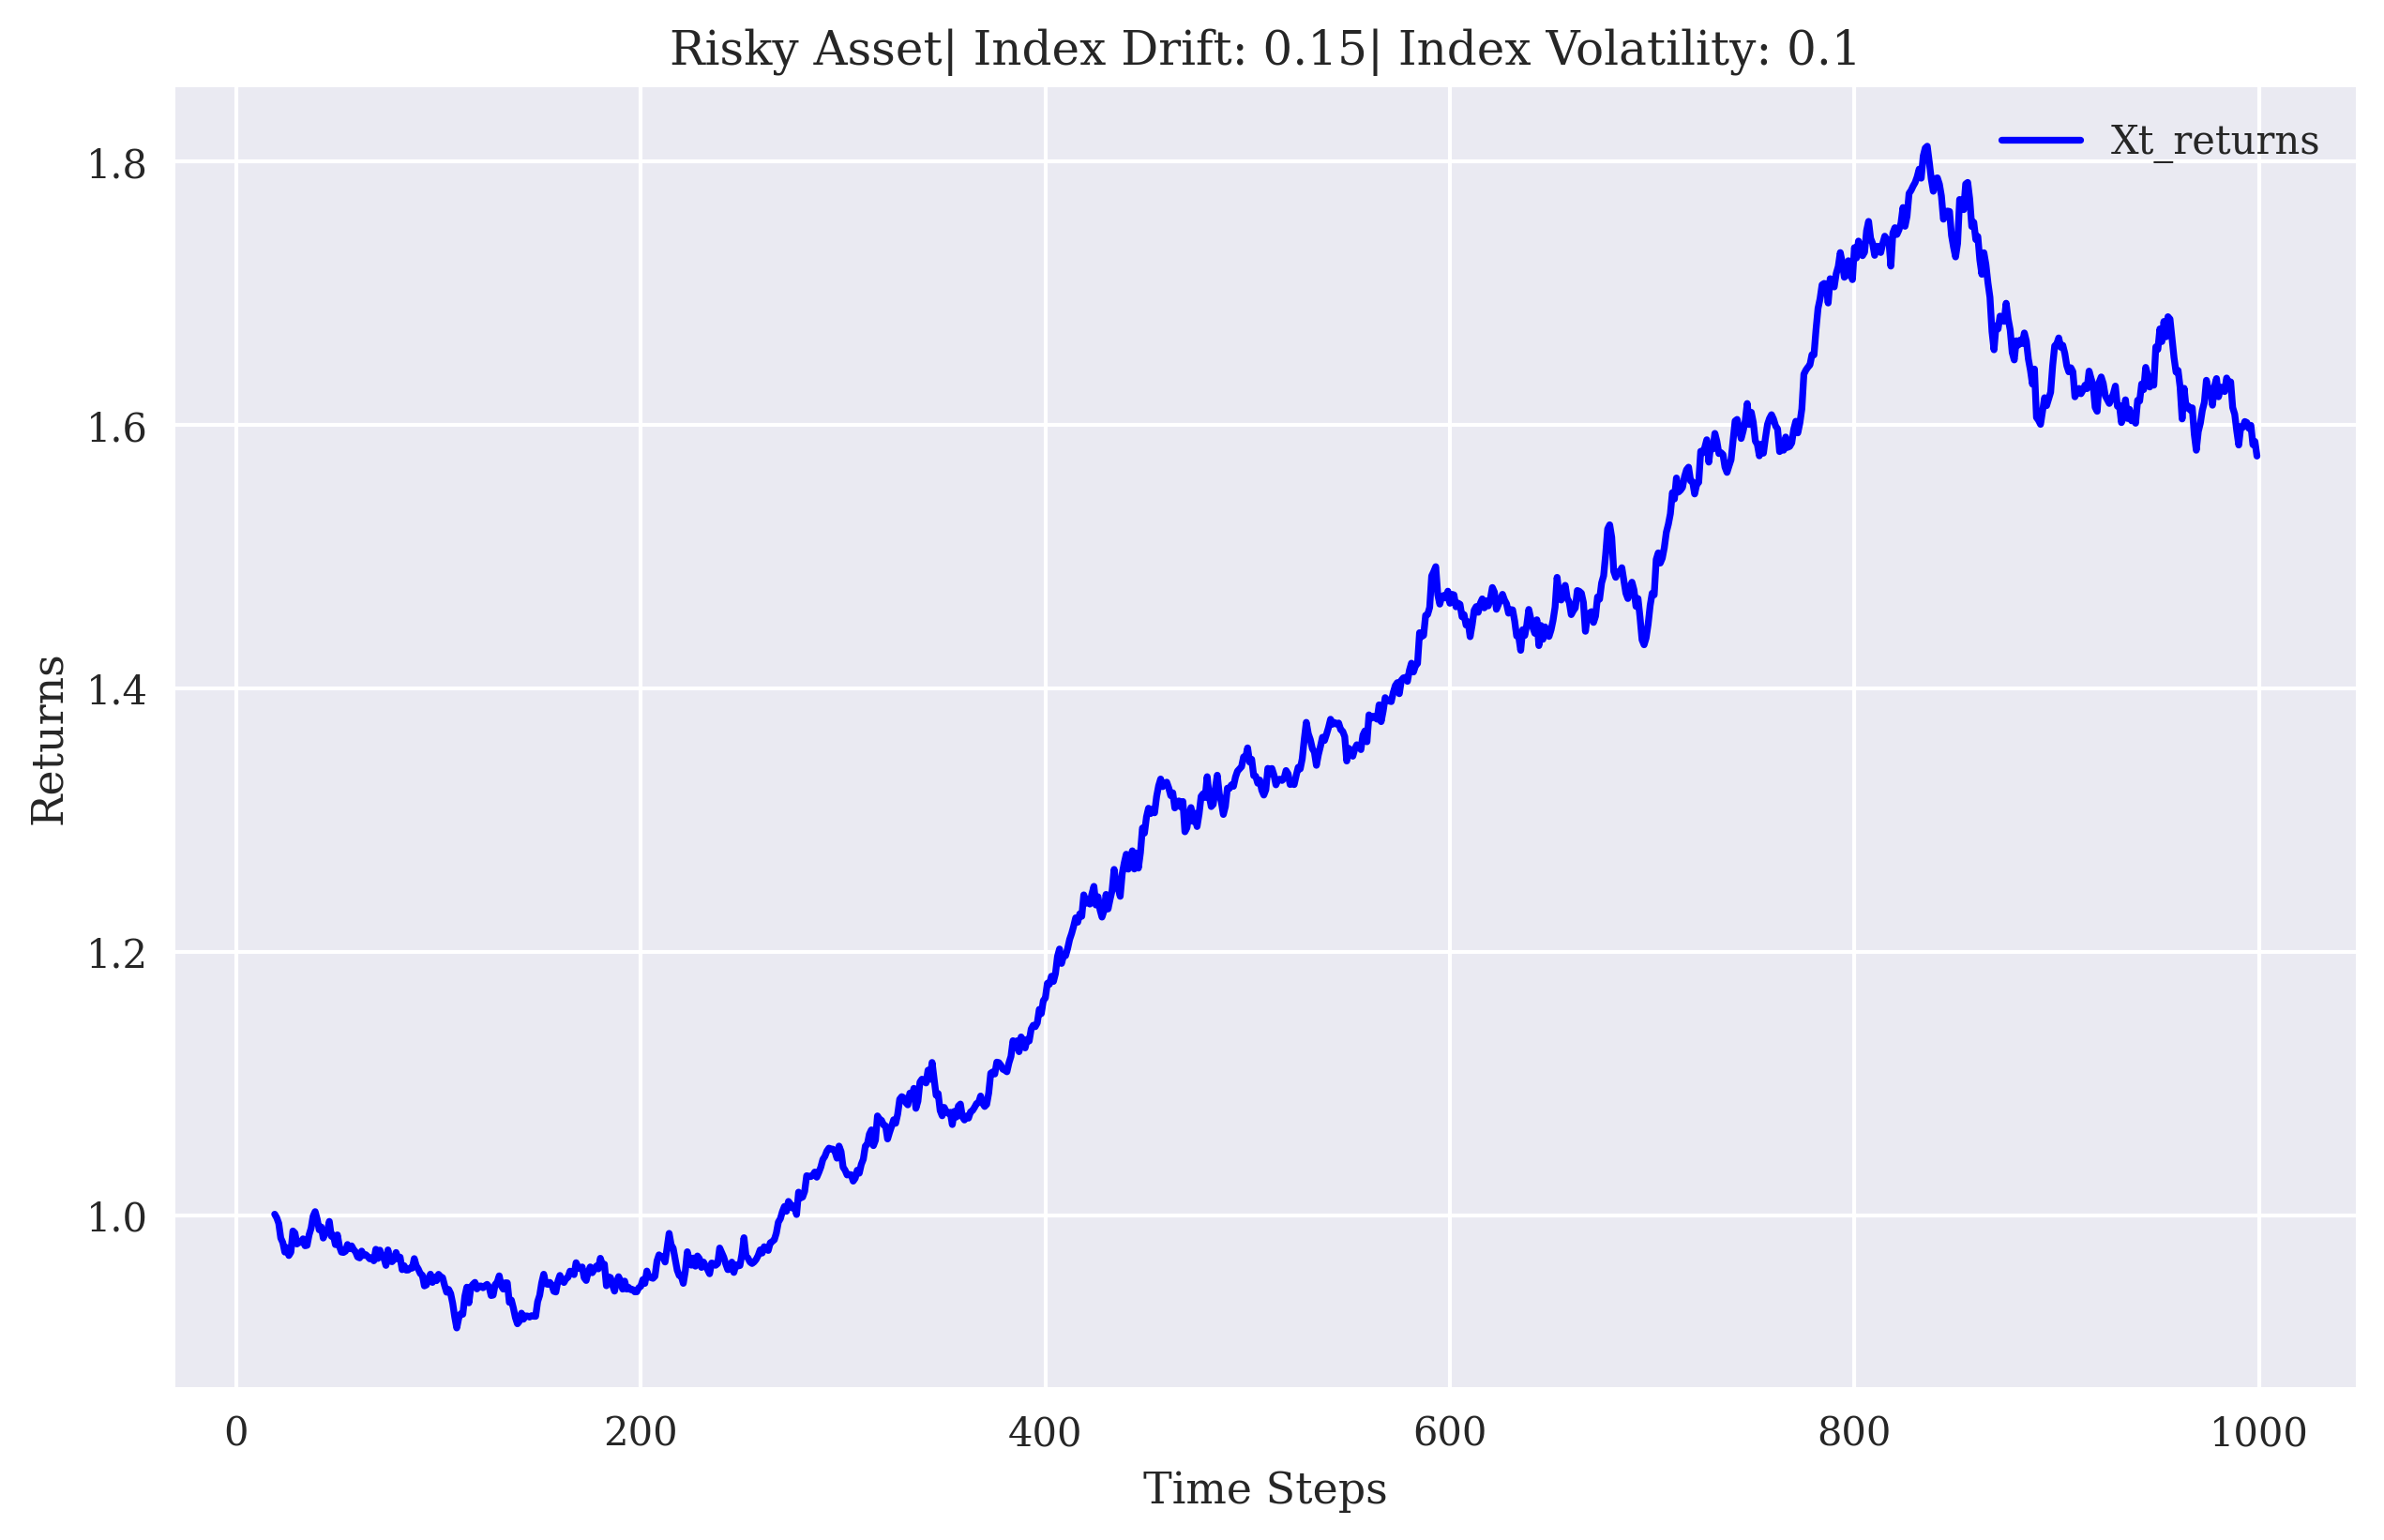

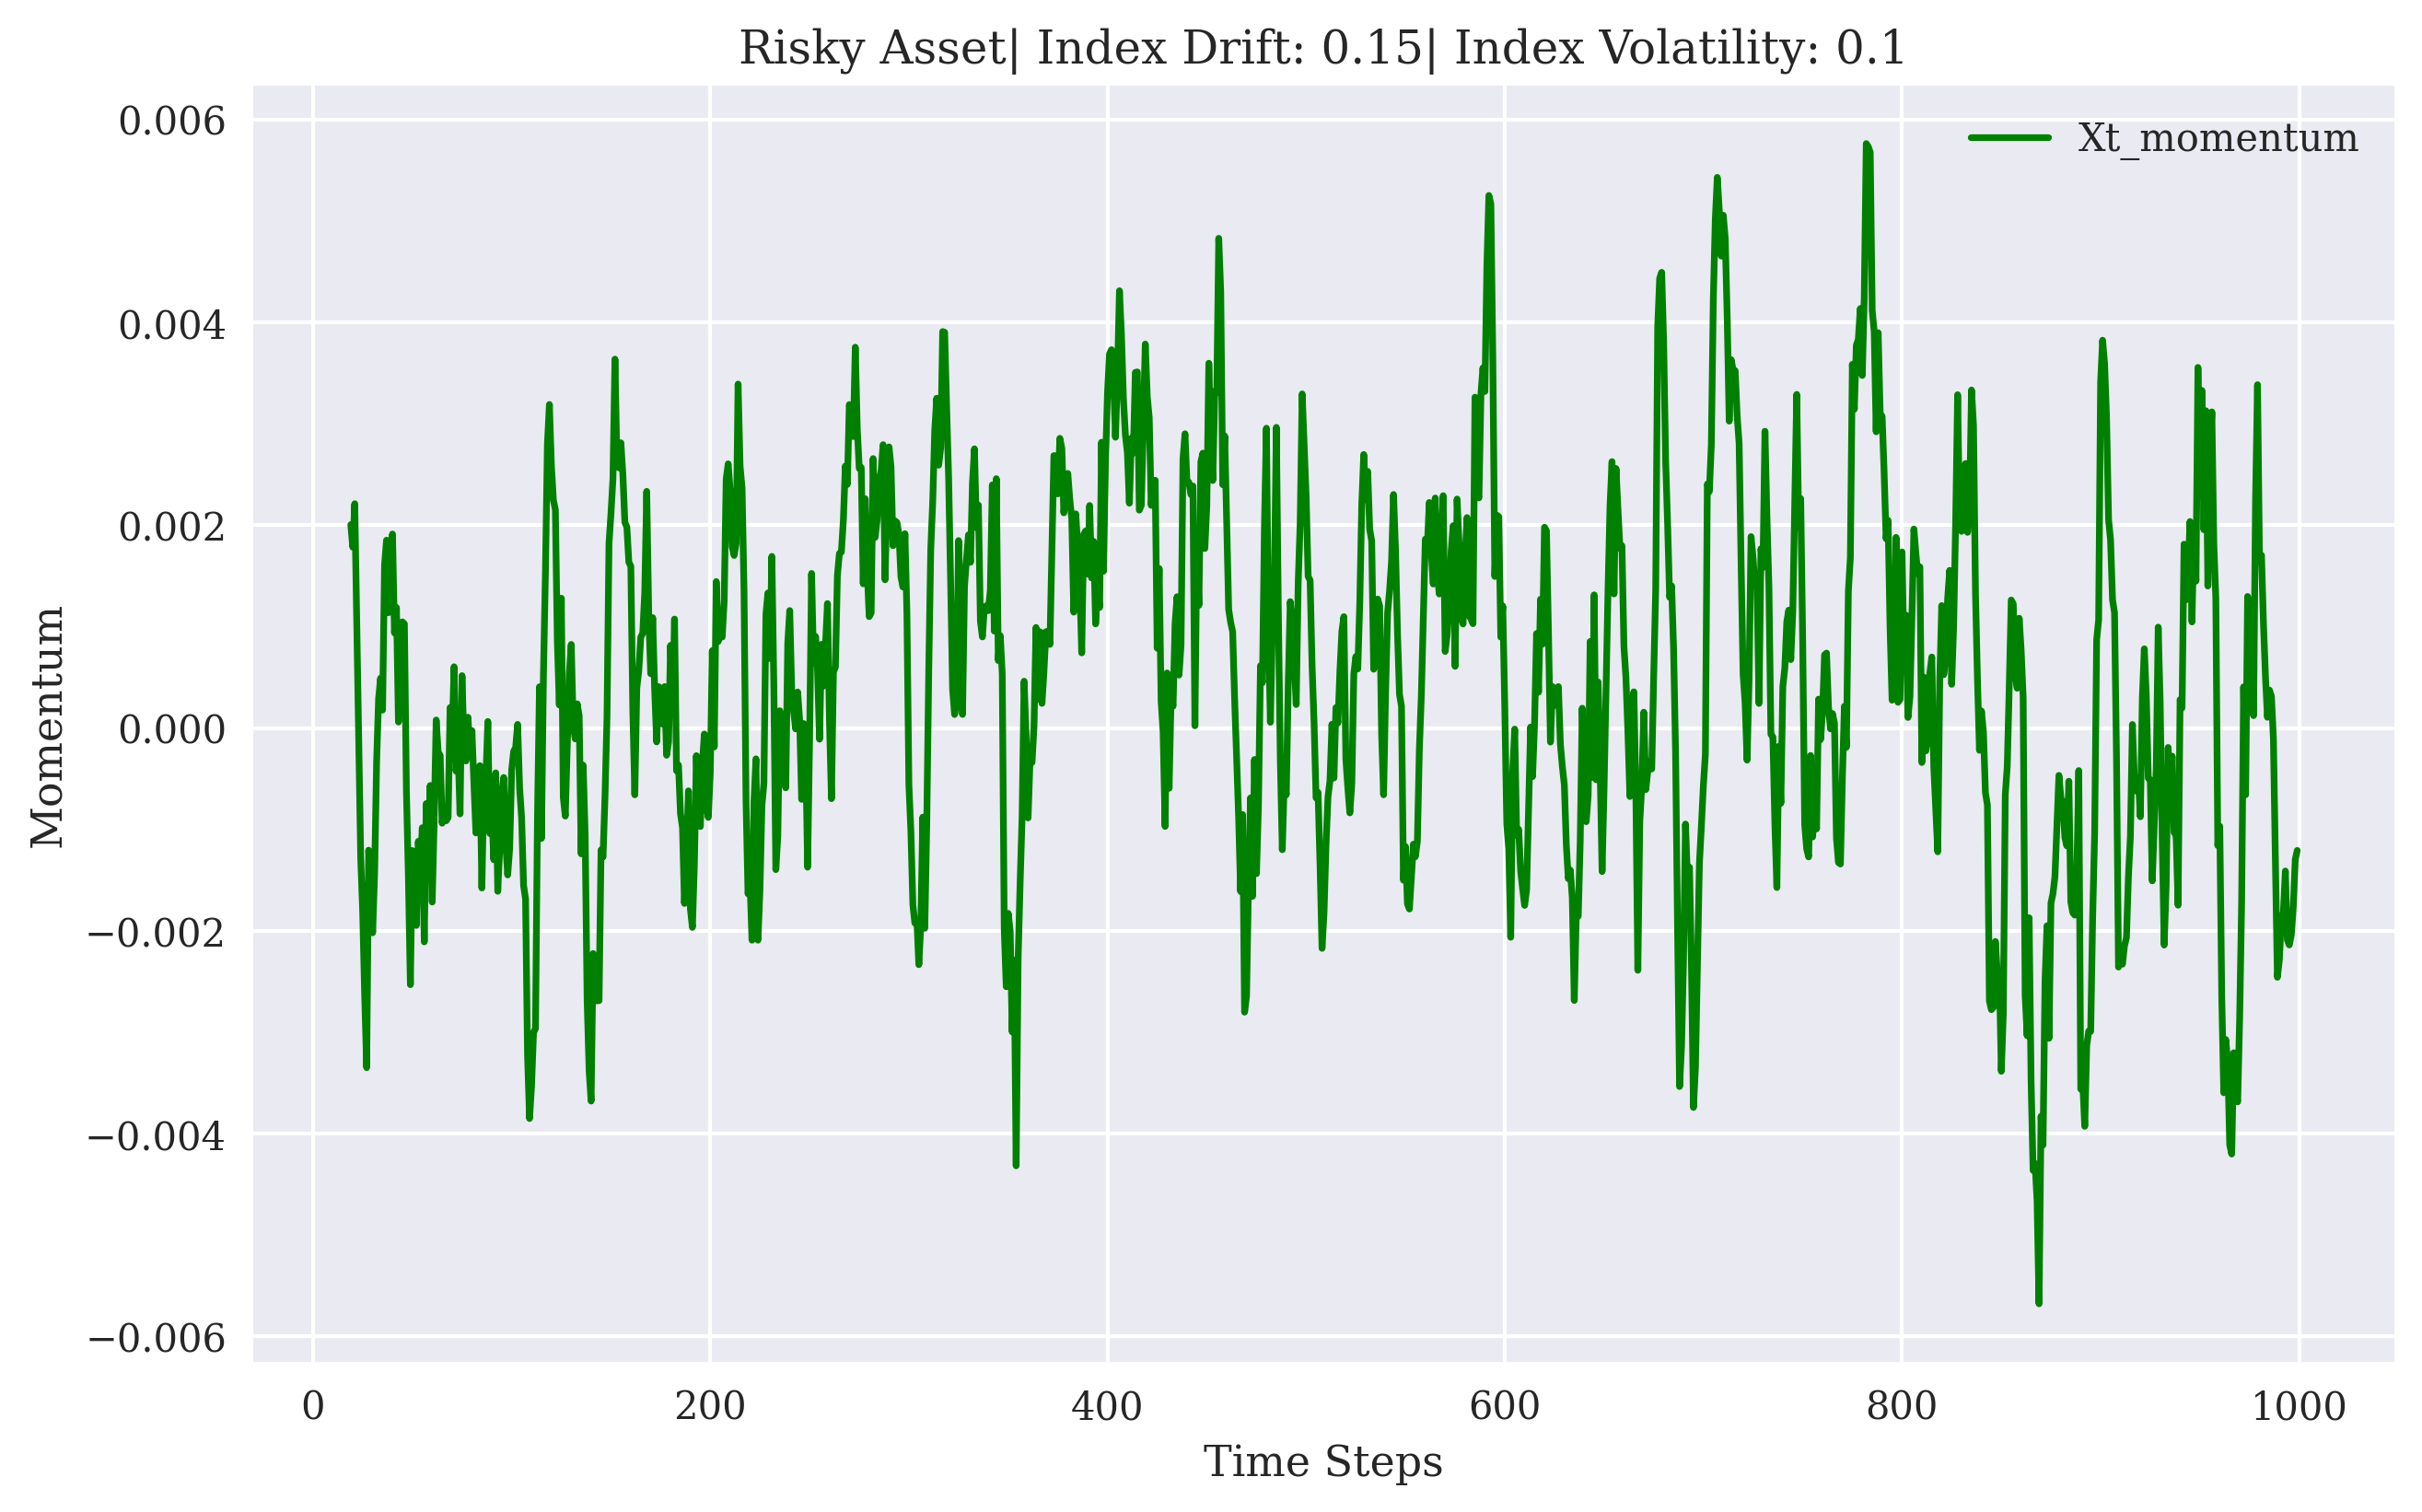

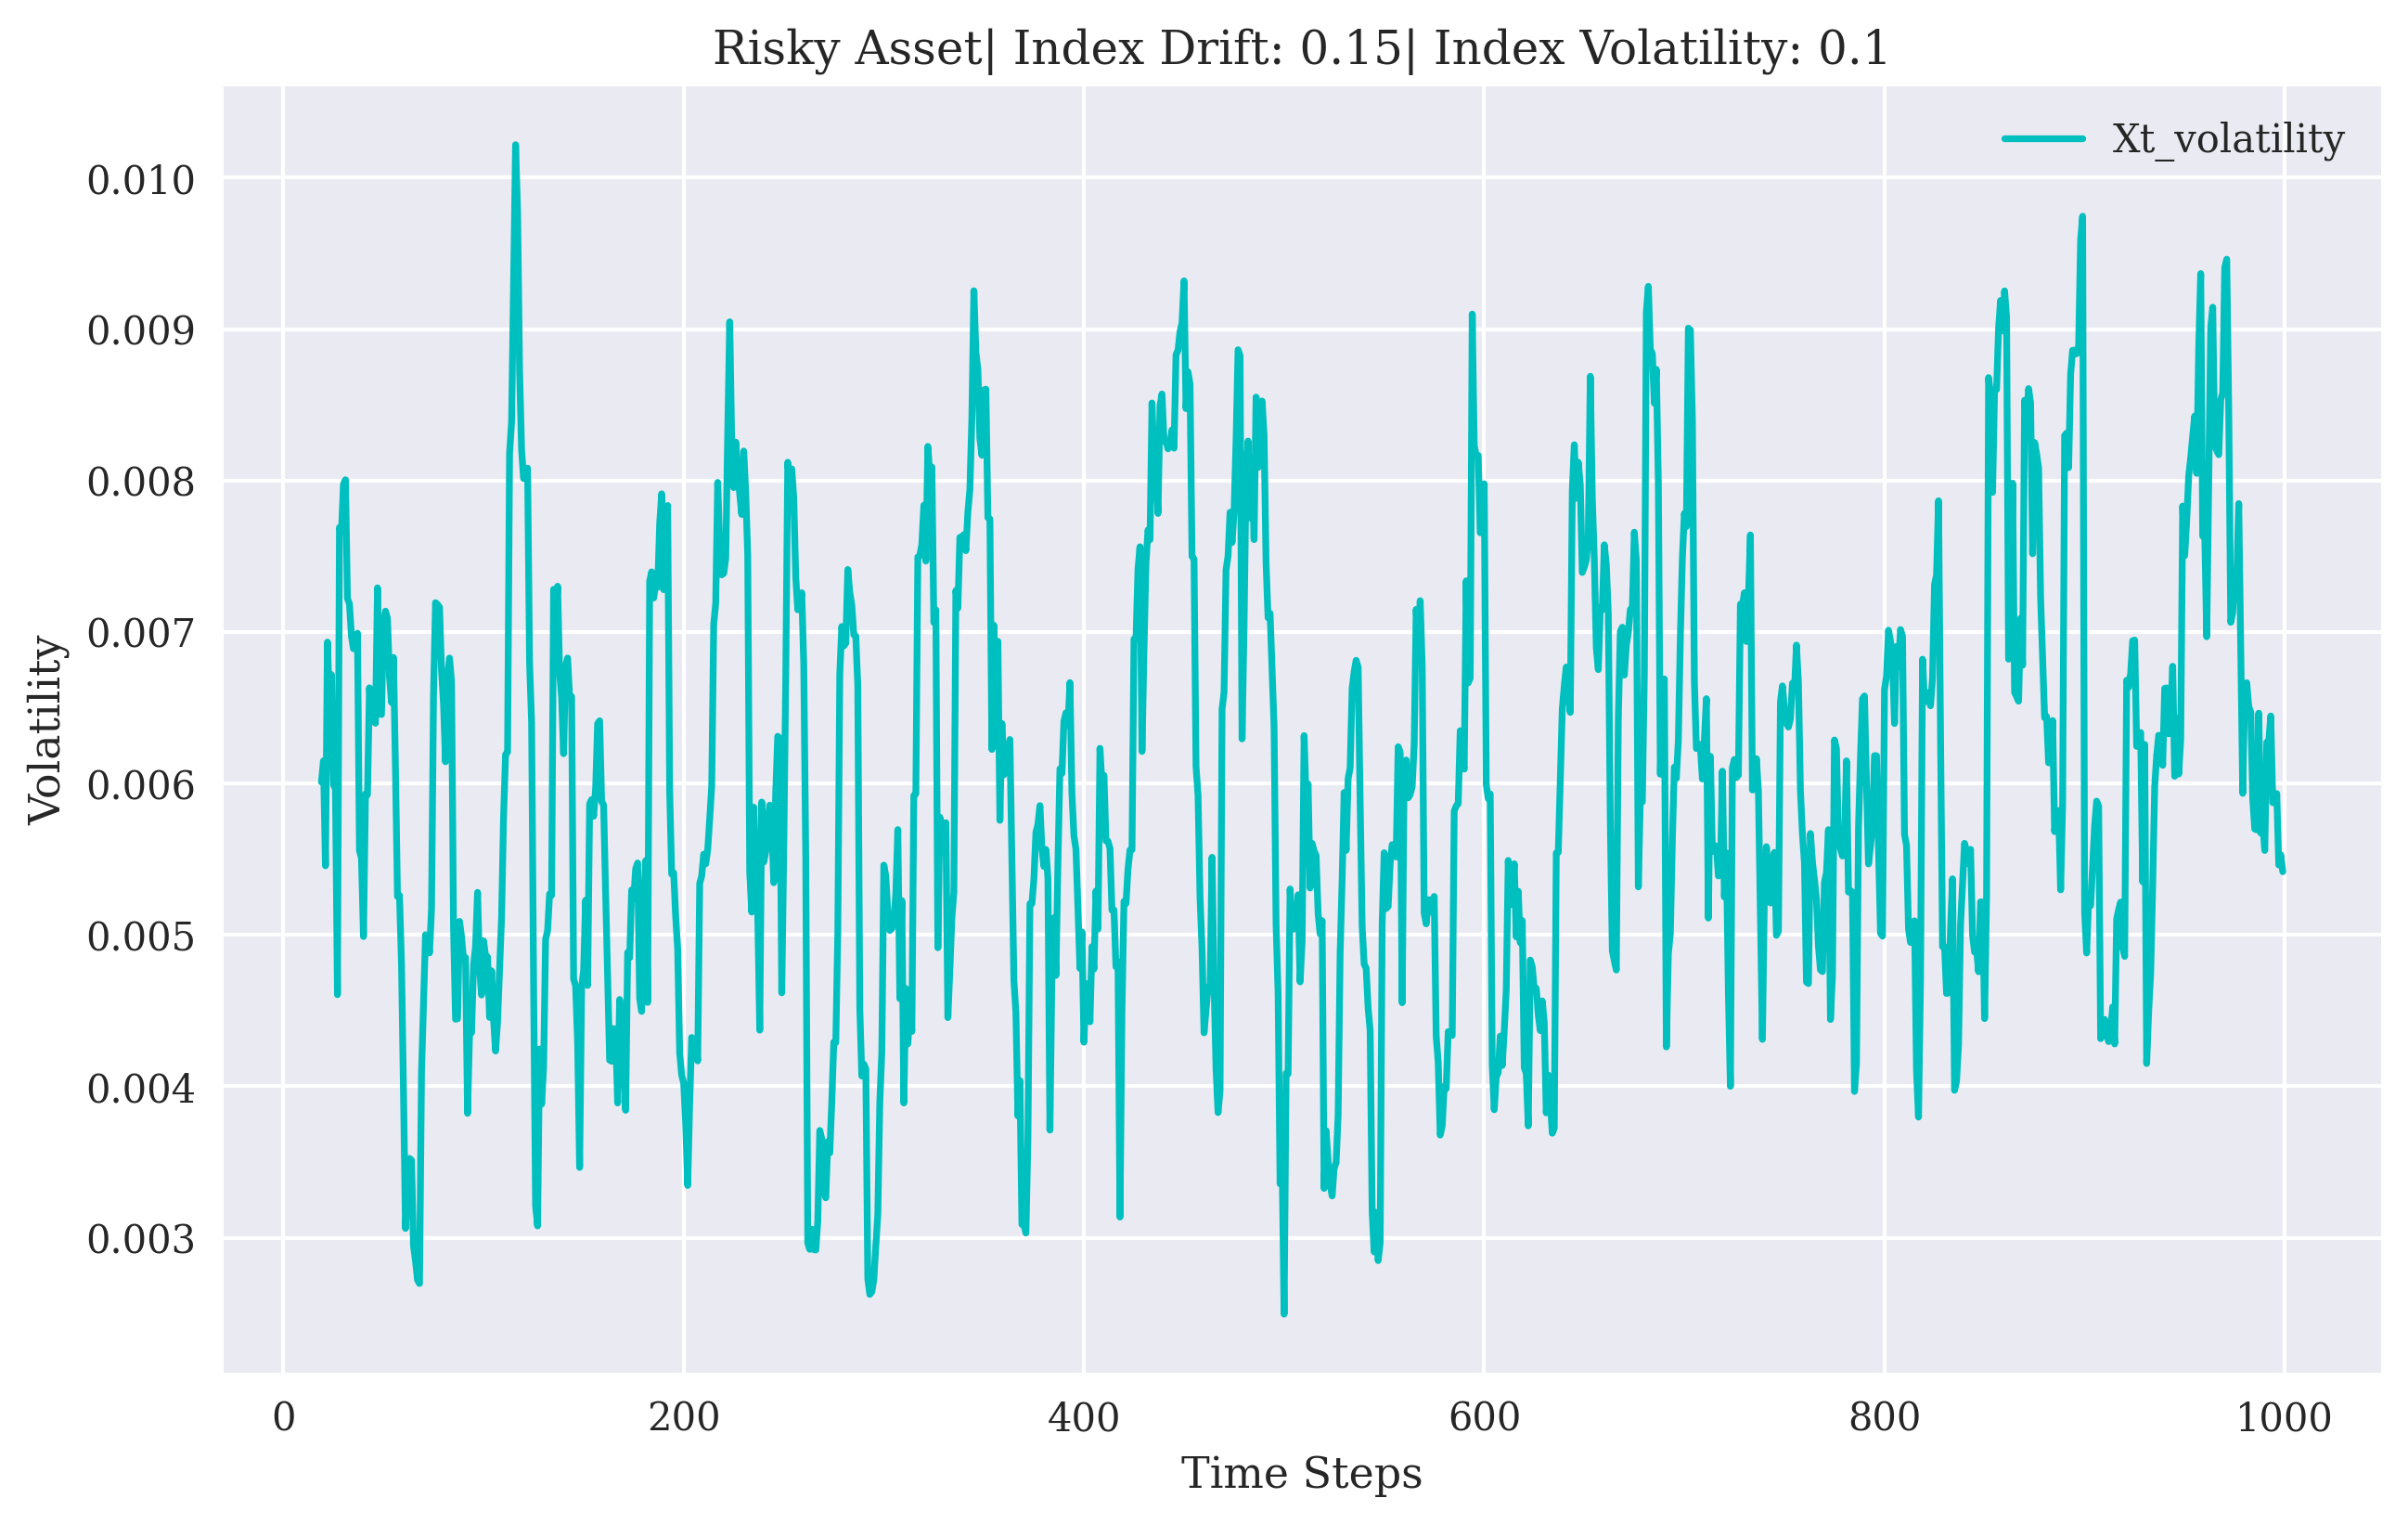

In [18]:
simulated_env.plots()

## Agent

### Model Config

In [19]:
model_config={
    "Model_1":[
        {
            "units":8,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None,
            "return_sequences":True
        },
        {
            "units":16,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None,
            "return_sequences":True
        },
        {
            "units":32,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None,
            "return_sequences":False
        }
    ],

    "Model_2":[
        {
            "units":4,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None,
            "return_sequences":True
        },
        {
            "units":8,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None,
            "return_sequences":True
        },
        {
            "units":16,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None,
            "return_sequences":False
        }
    ],

    "Model_3":[
        {
            "units":8,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None
        },

        {
            "units":16,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None
        },
        {
            "units":32,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None
        }
        
    ],

    "Model_4":[
        {
            "units":8,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None
        },

        {
            "units":16,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None
        },
        {
            "units":32,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None
        }
        
    ],

    "Final_Model":[
        {
            "units":128,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None
        },
        {
            "units":256,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None
        },
        {
            "units":64,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None
        },

        {
            "units":16,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":l2(0.007)
        },

        {
            "units":8,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None
        },

        {
            "units":1,
            "activation":"linear",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None
        }
        
    ]
    
}

### Optimizer Config

In [20]:
optimizer_config={
    "learning_rate":0.001,
    "beta_1":0.96,
    "beta_2":0.98
}

### Agent Initialization

In [21]:
agent=Agent(
    env=env,
    model_config=model_config,
    optimizer_config=optimizer_config,
    batch_size=128,
    buffer_size=2000,
    gamma=0.5,
    epsilon=1.0,
    epsilon_min=0.1,
    epsilon_decay=0.9975
    
)

2025-06-19 04:24:45.080852: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### Model Architecture

In [22]:
agent.get_model_architecture()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 6, 2)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 6, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 6, 8)      │        352 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 6, 4)      │         96 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 8)         │         40 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 8)         │         48 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 6, 16)     │      1,600 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 6, 8)      │        416 │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 16)        │        144 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 16)        │        144 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 32)        │      6,272 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 16)        │      1,600 │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │        544 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 32)        │        544 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 112)       │          0 │ lstm_2[0][0],     │
│ (Concatenate)       │                   │            │ lstm_5[0][0],     │
│                     │                   │            │ dense_2[0][0],    │
│                     │                   │            │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │     14,464 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 256)       │     33,024 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │     16,448 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 16)        │      1,040 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 76,921 (300.47 KB)

 Trainable params: 76,921 (300.47 KB)

 Non-trainable params: 0 (0.00 B)

### Agent Training

In [ ]:
agent.train_agent(
    episodes=50,
    steps_per_episode=2,
    training_version="1_o"
)

### Training Plots

In [ ]:
agent.training_plots()

### Training Episode Plots

In [ ]:
agent.episode_plots()

### Testing Agent

In [ ]:
agent.test_agent()